#Libraries, drive mount and data read

In [2]:
import os
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import classification_report
from sklearn.pipeline import FeatureUnion
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from scipy.sparse import hstack
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/PR/Final_Train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/PR/Final_Test.csv')
df_val = pd.read_csv('/content/drive/MyDrive/PR/Final_Val.csv')

In [5]:
df_train1 = df_train.sample(frac=0.50, random_state=42)

In [6]:
if tf.config.list_physical_devices('GPU'):
    device = "/device:GPU:0"
    print("GPU Available. Using GPU.")
else:
    device = "/device:CPU:0"
    print("GPU Not Available. Using CPU.")

GPU Available. Using GPU.


#Linear_SVC

In [7]:
def feature_based(train, test, c, x1, y1, gram, use_pca=False, use_lda=False, n_components=None):
    emotions = ["Love", "Joy", "Surprise", "Anger", "Sadness", "Fear"]
    metrics_dic = dict()

    for emotion in emotions:
        print(f"Evaluating for emotion: {emotion}")
        trainData = train['Data']
        trainLabel = train[emotion]
        testData = test['Data']
        testLabel = test[emotion].tolist()

        tfidf_vect_ngram = TfidfVectorizer(analyzer=gram, ngram_range=(x1, y1), tokenizer=lambda x: x.split())
        tfidf_vect_ngram.fit(trainData)
        xtrain_tfidf = tfidf_vect_ngram.transform(trainData)
        xtest_tfidf = tfidf_vect_ngram.transform(testData)

        if use_pca:
            pca = PCA(n_components=n_components)
            xtrain = pca.fit_transform(xtrain_tfidf.toarray())
            xtest = pca.transform(xtest_tfidf.toarray())
        elif use_lda:
            lda = LDA(n_components=n_components)
            xtrain = lda.fit_transform(xtrain_tfidf.toarray(), trainLabel)
            xtest = lda.transform(xtest_tfidf.toarray())
        else:
            xtrain = xtrain_tfidf.toarray()
            xtest = xtest_tfidf.toarray()

        linear = LinearSVC(C=c, penalty='l2', loss='squared_hinge')
        linear.fit(xtrain, trainLabel)
        pred_test = linear.predict(xtest)

        # Compute metrics with macro, micro, and weighted averages
        metrics_dic[emotion] = {
            'Accuracy': accuracy_score(testLabel, pred_test),
            'Precision (macro)': precision_score(testLabel, pred_test, average='macro'),
            'Precision (micro)': precision_score(testLabel, pred_test, average='micro'),
            'Precision (weighted)': precision_score(testLabel, pred_test, average='weighted'),
            'Recall (macro)': recall_score(testLabel, pred_test, average='macro'),
            'Recall (micro)': recall_score(testLabel, pred_test, average='micro'),
            'Recall (weighted)': recall_score(testLabel, pred_test, average='weighted'),
            'F1 Score (macro)': f1_score(testLabel, pred_test, average='macro'),
            'F1 Score (micro)': f1_score(testLabel, pred_test, average='micro'),
            'F1 Score (weighted)': f1_score(testLabel, pred_test, average='weighted'),
        }

        # Visualize the confusion matrix
        cm = confusion_matrix(testLabel, pred_test)
        plt.figure(figsize=(5, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
        plt.title(f'Confusion Matrix for {emotion}')
        plt.show()

    # Print metrics
    for emotion, scores in metrics_dic.items():
        print(f"\nMetrics for {emotion}:")
        for metric_name, metric_value in scores.items():
            print(f"{metric_name}: {metric_value:.2f}")

    # Calculate and print Macro Average F1-score across all emotions
    macro_avg_f1 = np.mean([score['F1 Score (macro)'] for score in metrics_dic.values()])
    print("\nMacro Average F1-score (across emotions): ", float('{:.2f}'.format(macro_avg_f1)))

Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


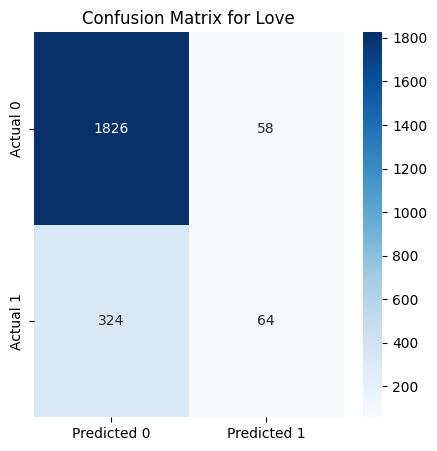

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


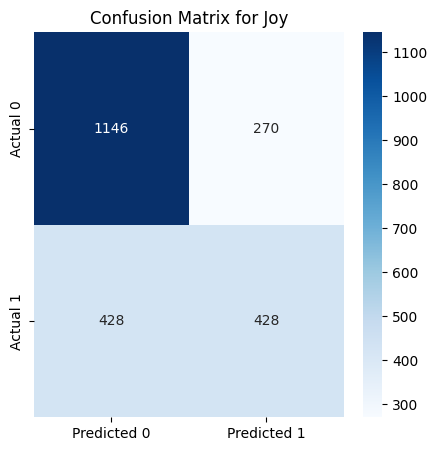

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


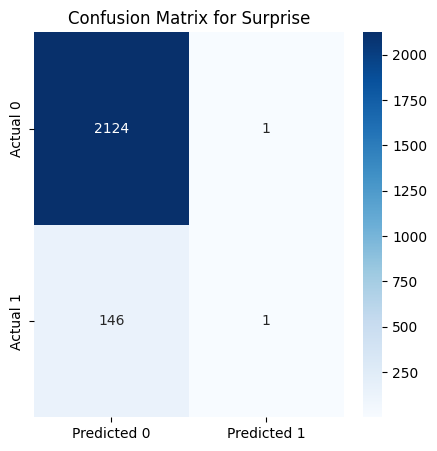

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


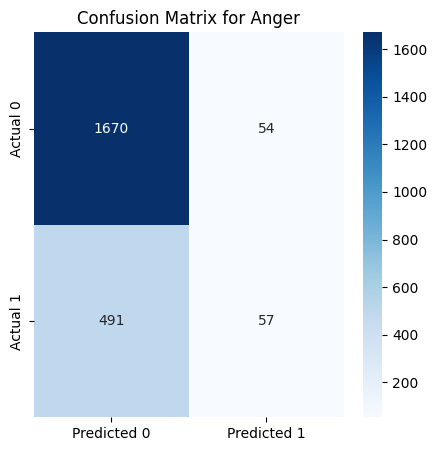

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


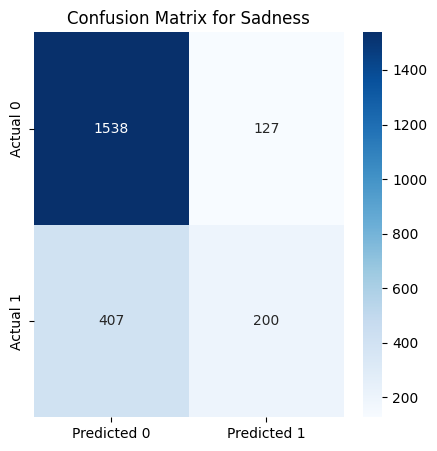

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


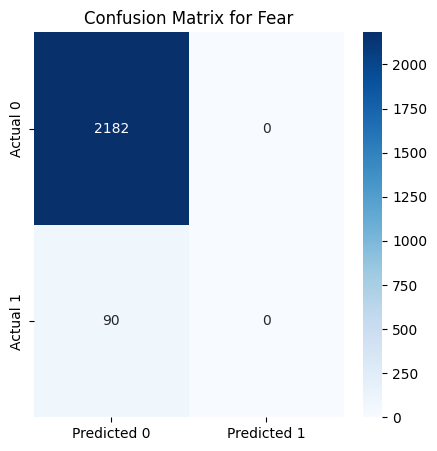


Metrics for Love:
Accuracy: 0.83
Precision (macro): 0.69
Precision (micro): 0.83
Precision (weighted): 0.79
Recall (macro): 0.57
Recall (micro): 0.83
Recall (weighted): 0.83
F1 Score (macro): 0.58
F1 Score (micro): 0.83
F1 Score (weighted): 0.79

Metrics for Joy:
Accuracy: 0.69
Precision (macro): 0.67
Precision (micro): 0.69
Precision (weighted): 0.68
Recall (macro): 0.65
Recall (micro): 0.69
Recall (weighted): 0.69
F1 Score (macro): 0.66
F1 Score (micro): 0.69
F1 Score (weighted): 0.69

Metrics for Surprise:
Accuracy: 0.94
Precision (macro): 0.72
Precision (micro): 0.94
Precision (weighted): 0.91
Recall (macro): 0.50
Recall (micro): 0.94
Recall (weighted): 0.94
F1 Score (macro): 0.49
F1 Score (micro): 0.94
F1 Score (weighted): 0.90

Metrics for Anger:
Accuracy: 0.76
Precision (macro): 0.64
Precision (micro): 0.76
Precision (weighted): 0.71
Recall (macro): 0.54
Recall (micro): 0.76
Recall (weighted): 0.76
F1 Score (macro): 0.52
F1 Score (micro): 0.76
F1 Score (weighted): 0.69

Metrics

In [8]:
#For Unigram PCA
feature_based(df_train1, df_test, c=10, x1=1, y1=1, gram="word", use_pca=True, n_components=100)

Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


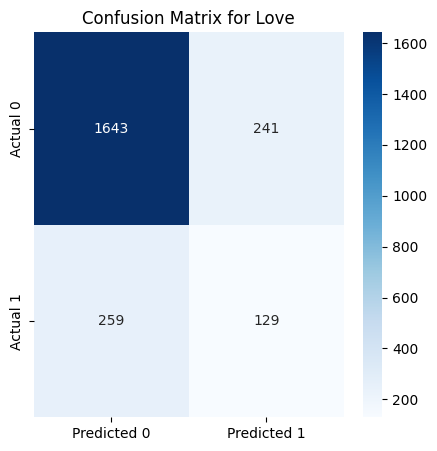

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


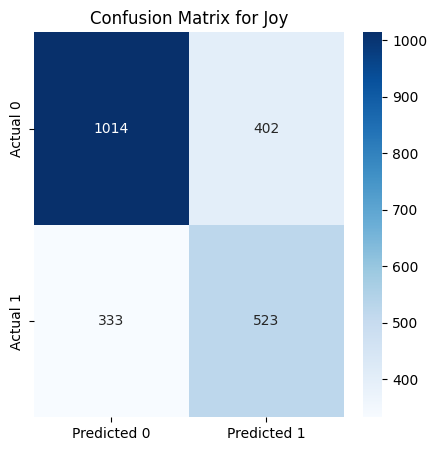

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


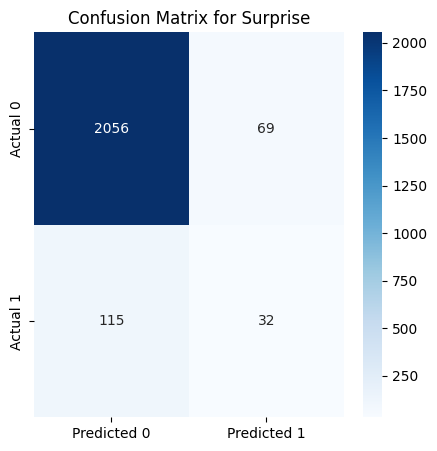

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


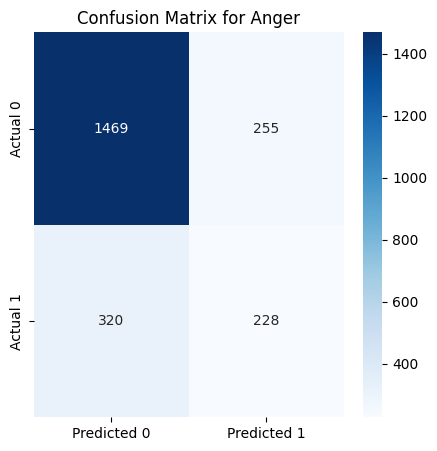

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


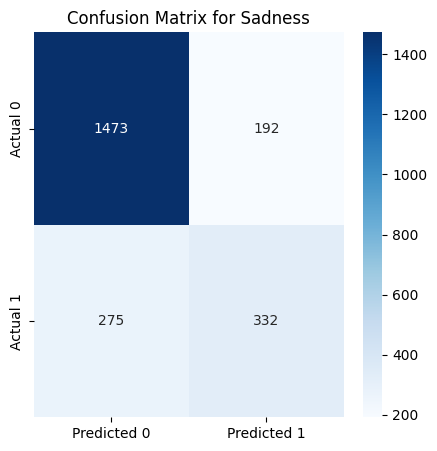

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


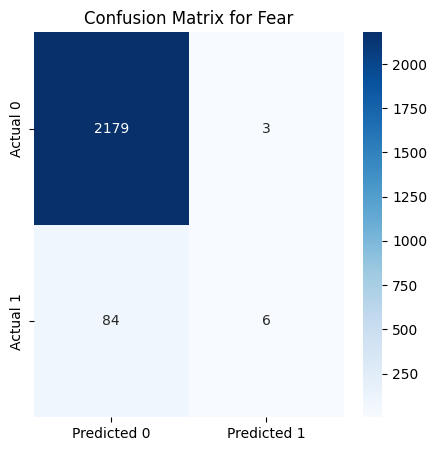


Metrics for Love:
Accuracy: 0.78
Precision (macro): 0.61
Precision (micro): 0.78
Precision (weighted): 0.78
Recall (macro): 0.60
Recall (micro): 0.78
Recall (weighted): 0.78
F1 Score (macro): 0.60
F1 Score (micro): 0.78
F1 Score (weighted): 0.78

Metrics for Joy:
Accuracy: 0.68
Precision (macro): 0.66
Precision (micro): 0.68
Precision (weighted): 0.68
Recall (macro): 0.66
Recall (micro): 0.68
Recall (weighted): 0.68
F1 Score (macro): 0.66
F1 Score (micro): 0.68
F1 Score (weighted): 0.68

Metrics for Surprise:
Accuracy: 0.92
Precision (macro): 0.63
Precision (micro): 0.92
Precision (weighted): 0.91
Recall (macro): 0.59
Recall (micro): 0.92
Recall (weighted): 0.92
F1 Score (macro): 0.61
F1 Score (micro): 0.92
F1 Score (weighted): 0.91

Metrics for Anger:
Accuracy: 0.75
Precision (macro): 0.65
Precision (micro): 0.75
Precision (weighted): 0.74
Recall (macro): 0.63
Recall (micro): 0.75
Recall (weighted): 0.75
F1 Score (macro): 0.64
F1 Score (micro): 0.75
F1 Score (weighted): 0.74

Metrics

In [9]:
#For unigram (without PCA)
feature_based(df_train1, df_test, c=10, x1=1, y1=1, gram="word", use_lda=False, n_components=None)

Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


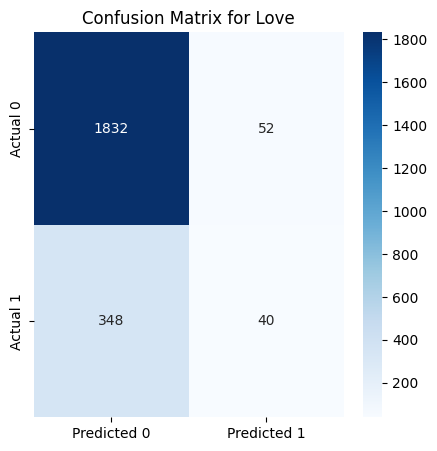

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


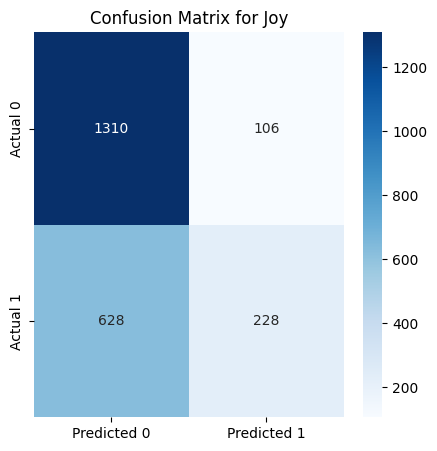

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


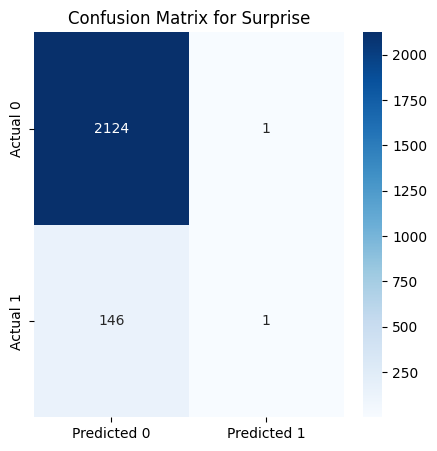

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


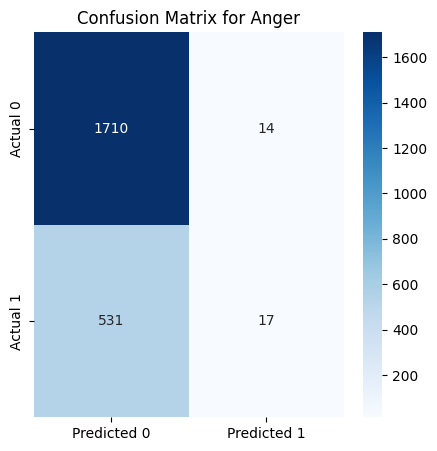

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


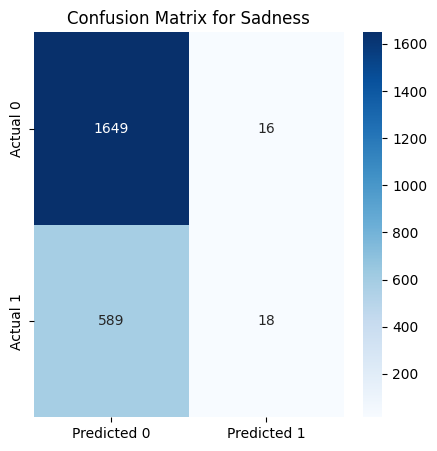

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


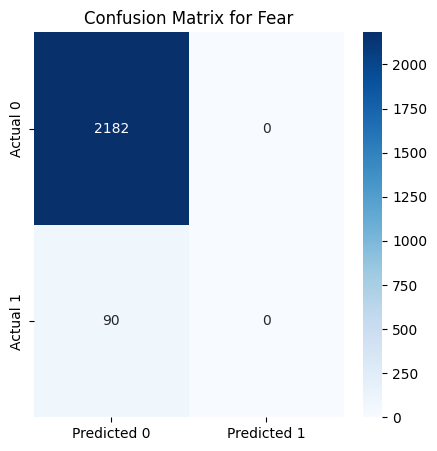


Metrics for Love:
Accuracy: 0.82
Precision (macro): 0.64
Precision (micro): 0.82
Precision (weighted): 0.77
Recall (macro): 0.54
Recall (micro): 0.82
Recall (weighted): 0.82
F1 Score (macro): 0.53
F1 Score (micro): 0.82
F1 Score (weighted): 0.78

Metrics for Joy:
Accuracy: 0.68
Precision (macro): 0.68
Precision (micro): 0.68
Precision (weighted): 0.68
Recall (macro): 0.60
Recall (micro): 0.68
Recall (weighted): 0.68
F1 Score (macro): 0.58
F1 Score (micro): 0.68
F1 Score (weighted): 0.63

Metrics for Surprise:
Accuracy: 0.94
Precision (macro): 0.72
Precision (micro): 0.94
Precision (weighted): 0.91
Recall (macro): 0.50
Recall (micro): 0.94
Recall (weighted): 0.94
F1 Score (macro): 0.49
F1 Score (micro): 0.94
F1 Score (weighted): 0.90

Metrics for Anger:
Accuracy: 0.76
Precision (macro): 0.66
Precision (micro): 0.76
Precision (weighted): 0.71
Recall (macro): 0.51
Recall (micro): 0.76
Recall (weighted): 0.76
F1 Score (macro): 0.46
F1 Score (micro): 0.76
F1 Score (weighted): 0.67

Metrics

In [10]:
#For Bigram PCA
feature_based(df_train1, df_test, c=10, x1=2, y1=2, gram="word", use_pca=True, n_components=100)

Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


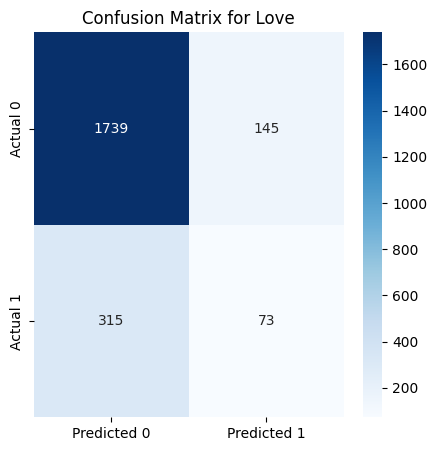

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


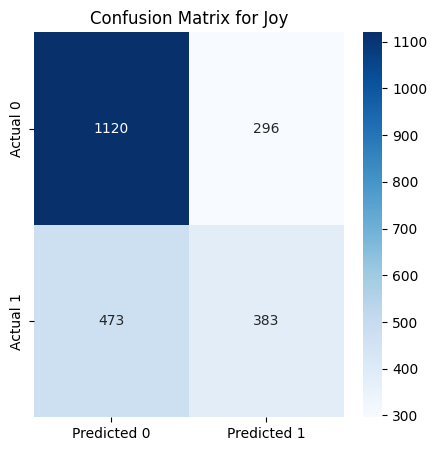

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


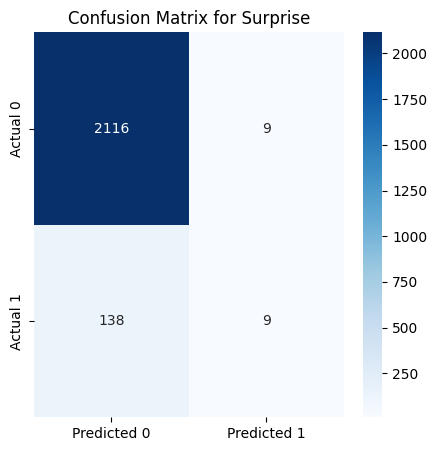

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


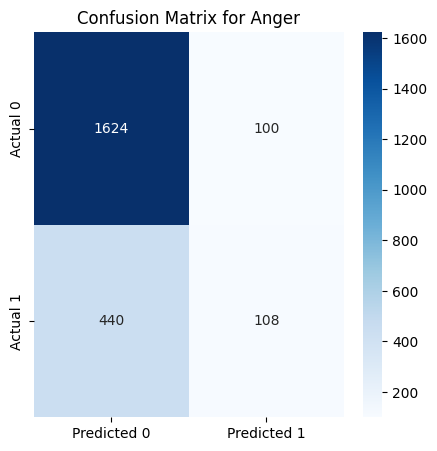

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


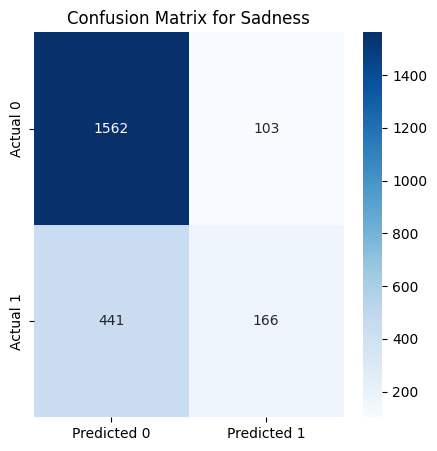

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


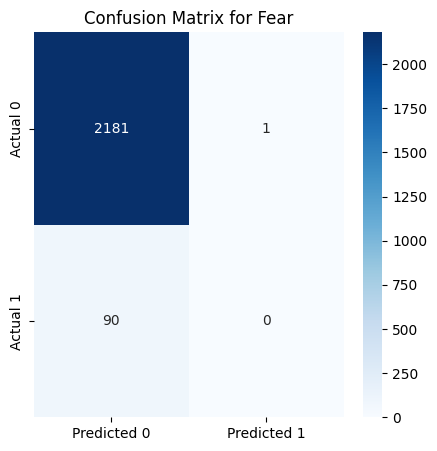


Metrics for Love:
Accuracy: 0.80
Precision (macro): 0.59
Precision (micro): 0.80
Precision (weighted): 0.76
Recall (macro): 0.56
Recall (micro): 0.80
Recall (weighted): 0.80
F1 Score (macro): 0.56
F1 Score (micro): 0.80
F1 Score (weighted): 0.77

Metrics for Joy:
Accuracy: 0.66
Precision (macro): 0.63
Precision (micro): 0.66
Precision (weighted): 0.65
Recall (macro): 0.62
Recall (micro): 0.66
Recall (weighted): 0.66
F1 Score (macro): 0.62
F1 Score (micro): 0.66
F1 Score (weighted): 0.65

Metrics for Surprise:
Accuracy: 0.94
Precision (macro): 0.72
Precision (micro): 0.94
Precision (weighted): 0.91
Recall (macro): 0.53
Recall (micro): 0.94
Recall (weighted): 0.94
F1 Score (macro): 0.54
F1 Score (micro): 0.94
F1 Score (weighted): 0.91

Metrics for Anger:
Accuracy: 0.76
Precision (macro): 0.65
Precision (micro): 0.76
Precision (weighted): 0.72
Recall (macro): 0.57
Recall (micro): 0.76
Recall (weighted): 0.76
F1 Score (macro): 0.57
F1 Score (micro): 0.76
F1 Score (weighted): 0.72

Metrics

In [11]:
#For Bigram (without PCA)
feature_based(df_train1, df_test, c=10, x1=2, y1=2, gram="word", use_lda=False, n_components=None)

Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


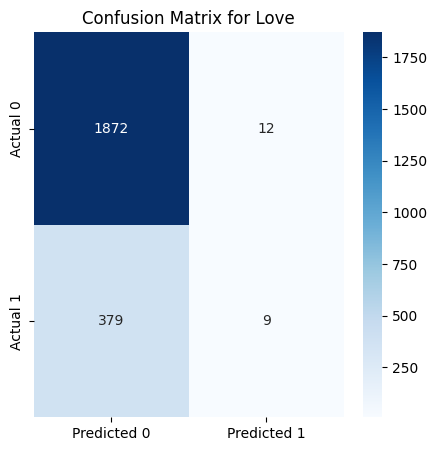

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


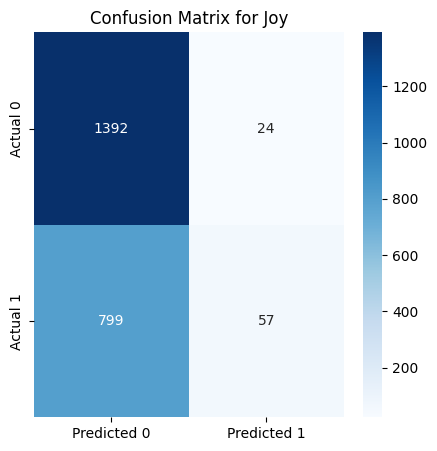

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


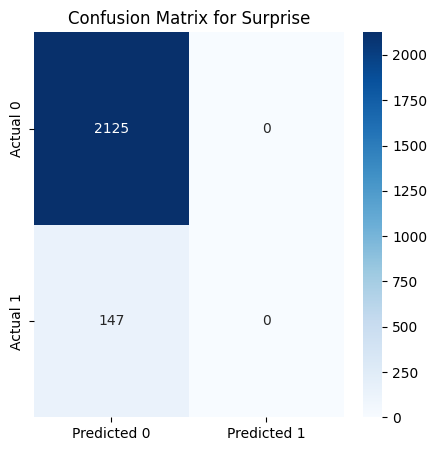

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


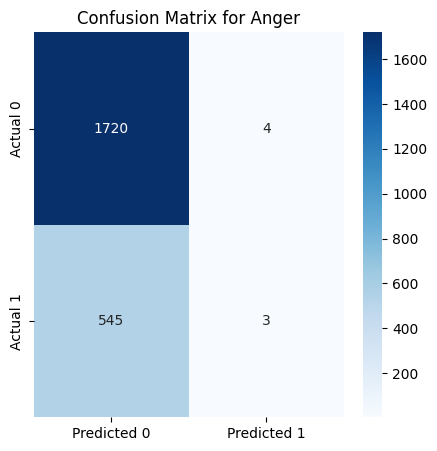

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


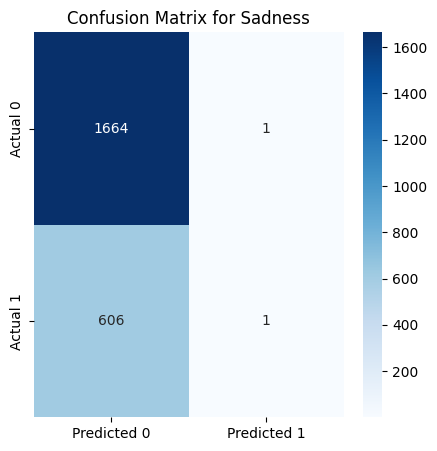

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


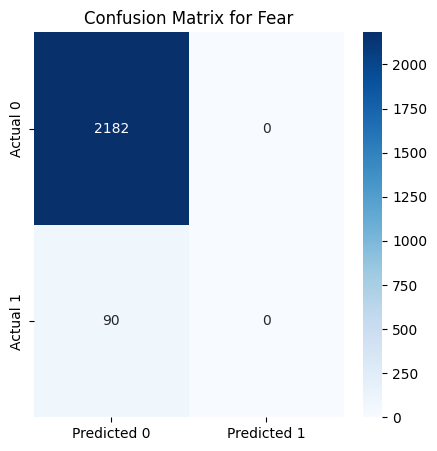


Metrics for Love:
Accuracy: 0.83
Precision (macro): 0.63
Precision (micro): 0.83
Precision (weighted): 0.76
Recall (macro): 0.51
Recall (micro): 0.83
Recall (weighted): 0.83
F1 Score (macro): 0.47
F1 Score (micro): 0.83
F1 Score (weighted): 0.76

Metrics for Joy:
Accuracy: 0.64
Precision (macro): 0.67
Precision (micro): 0.64
Precision (weighted): 0.66
Recall (macro): 0.52
Recall (micro): 0.64
Recall (weighted): 0.64
F1 Score (macro): 0.45
F1 Score (micro): 0.64
F1 Score (weighted): 0.53

Metrics for Surprise:
Accuracy: 0.94
Precision (macro): 0.47
Precision (micro): 0.94
Precision (weighted): 0.87
Recall (macro): 0.50
Recall (micro): 0.94
Recall (weighted): 0.94
F1 Score (macro): 0.48
F1 Score (micro): 0.94
F1 Score (weighted): 0.90

Metrics for Anger:
Accuracy: 0.76
Precision (macro): 0.59
Precision (micro): 0.76
Precision (weighted): 0.68
Recall (macro): 0.50
Recall (micro): 0.76
Recall (weighted): 0.76
F1 Score (macro): 0.44
F1 Score (micro): 0.76
F1 Score (weighted): 0.66

Metrics

In [12]:
#For Trigram PCA
feature_based(df_train1, df_test, c=10, x1=3, y1=3, gram="word", use_pca=True, n_components=100)

Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


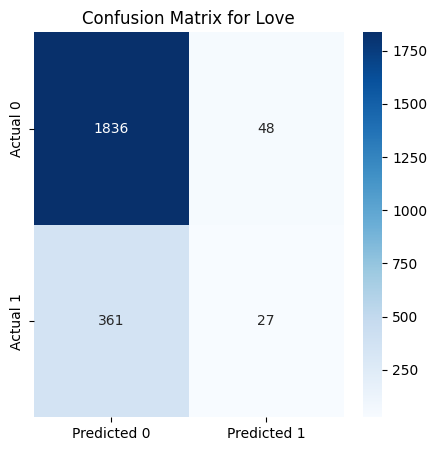

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


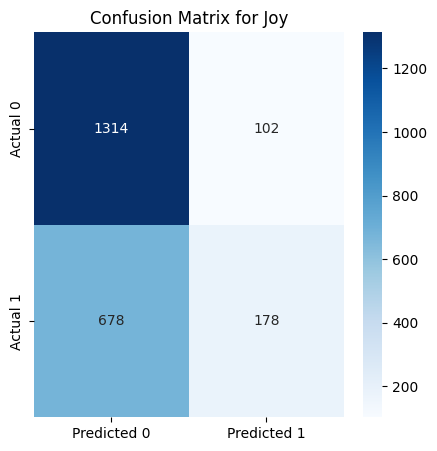

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


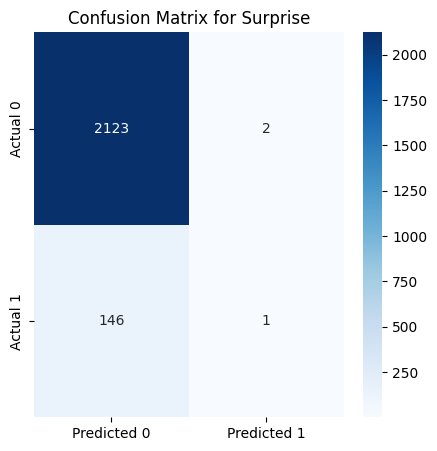

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


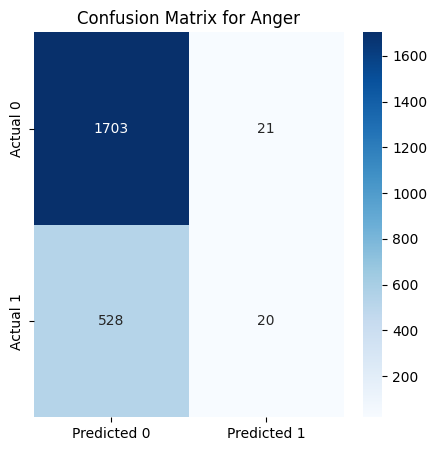

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


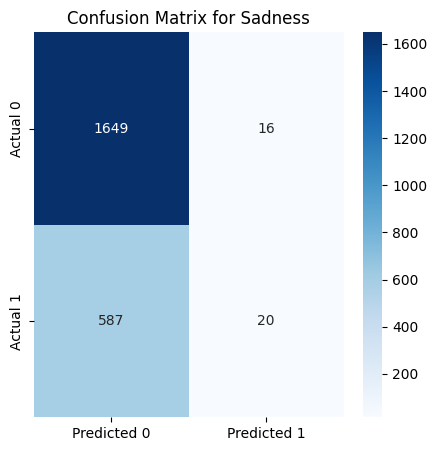

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


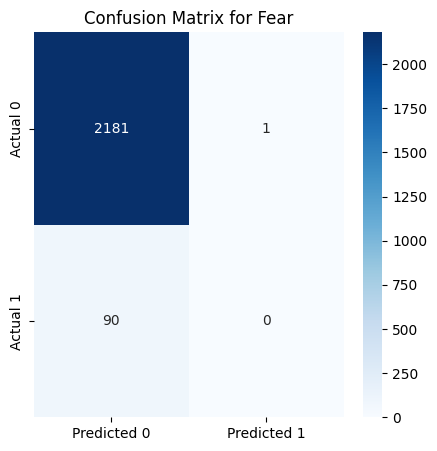


Metrics for Love:
Accuracy: 0.82
Precision (macro): 0.60
Precision (micro): 0.82
Precision (weighted): 0.75
Recall (macro): 0.52
Recall (micro): 0.82
Recall (weighted): 0.82
F1 Score (macro): 0.51
F1 Score (micro): 0.82
F1 Score (weighted): 0.77

Metrics for Joy:
Accuracy: 0.66
Precision (macro): 0.65
Precision (micro): 0.66
Precision (weighted): 0.65
Recall (macro): 0.57
Recall (micro): 0.66
Recall (weighted): 0.66
F1 Score (macro): 0.54
F1 Score (micro): 0.66
F1 Score (weighted): 0.60

Metrics for Surprise:
Accuracy: 0.93
Precision (macro): 0.63
Precision (micro): 0.93
Precision (weighted): 0.90
Recall (macro): 0.50
Recall (micro): 0.93
Recall (weighted): 0.93
F1 Score (macro): 0.49
F1 Score (micro): 0.93
F1 Score (weighted): 0.90

Metrics for Anger:
Accuracy: 0.76
Precision (macro): 0.63
Precision (micro): 0.76
Precision (weighted): 0.70
Recall (macro): 0.51
Recall (micro): 0.76
Recall (weighted): 0.76
F1 Score (macro): 0.46
F1 Score (micro): 0.76
F1 Score (weighted): 0.67

Metrics

In [13]:
#For Trigram (without PCA)
feature_based(df_train1, df_test, c=10, x1=3, y1=3, gram="word", use_lda=False, n_components=None)

#KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
def feature_based(train, test, c, x1, y1, gram, use_pca=False, use_lda=False, n_components=None):
    emotions = ["Love", "Joy", "Surprise", "Anger", "Sadness", "Fear"]
    metrics_dic = dict()

    for emotion in emotions:
        print(f"Evaluating for emotion: {emotion}")
        trainData = train['Data']
        trainLabel = train[emotion]
        testData = test['Data']
        testLabel = test[emotion].tolist()

        tfidf_vect_ngram = TfidfVectorizer(analyzer=gram, ngram_range=(x1, y1), tokenizer=lambda x: x.split())
        tfidf_vect_ngram.fit(trainData)
        xtrain_tfidf = tfidf_vect_ngram.transform(trainData)
        xtest_tfidf = tfidf_vect_ngram.transform(testData)

        if use_pca:
            pca = PCA(n_components=n_components)
            xtrain = pca.fit_transform(xtrain_tfidf.toarray())
            xtest = pca.transform(xtest_tfidf.toarray())
        elif use_lda:
            lda = LDA(n_components=n_components)
            xtrain = lda.fit_transform(xtrain_tfidf.toarray(), trainLabel)
            xtest = lda.transform(xtest_tfidf.toarray())
        else:
            xtrain = xtrain_tfidf.toarray()
            xtest = xtest_tfidf.toarray()

        knn = KNeighborsClassifier(n_neighbors=2)
        knn.fit(xtrain, trainLabel)
        pred_test = knn.predict(xtest)

        # Compute metrics with macro, micro, and weighted averages
        metrics_dic[emotion] = {
            'Accuracy': accuracy_score(testLabel, pred_test),
            'Precision (macro)': precision_score(testLabel, pred_test, average='macro'),
            'Precision (micro)': precision_score(testLabel, pred_test, average='micro'),
            'Precision (weighted)': precision_score(testLabel, pred_test, average='weighted'),
            'Recall (macro)': recall_score(testLabel, pred_test, average='macro'),
            'Recall (micro)': recall_score(testLabel, pred_test, average='micro'),
            'Recall (weighted)': recall_score(testLabel, pred_test, average='weighted'),
            'F1 Score (macro)': f1_score(testLabel, pred_test, average='macro'),
            'F1 Score (micro)': f1_score(testLabel, pred_test, average='micro'),
            'F1 Score (weighted)': f1_score(testLabel, pred_test, average='weighted'),
        }

        # Visualize the confusion matrix
        cm = confusion_matrix(testLabel, pred_test)
        plt.figure(figsize=(5, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
        plt.title(f'Confusion Matrix for {emotion}')
        plt.show()

    # Print metrics
    for emotion, scores in metrics_dic.items():
        print(f"\nMetrics for {emotion}:")
        for metric_name, metric_value in scores.items():
            print(f"{metric_name}: {metric_value:.2f}")

    # Calculate and print Macro Average F1-score across all emotions
    macro_avg_f1 = np.mean([score['F1 Score (macro)'] for score in metrics_dic.values()])
    print("\nMacro Average F1-score (across emotions): ", float('{:.2f}'.format(macro_avg_f1)))

Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


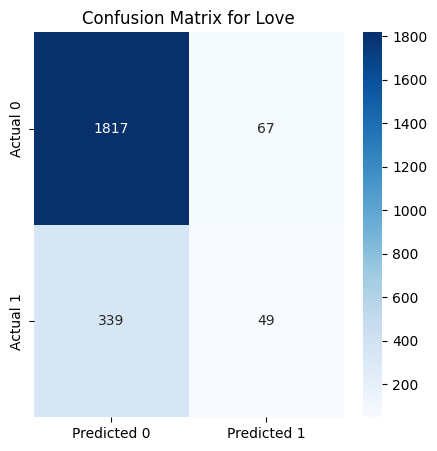

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


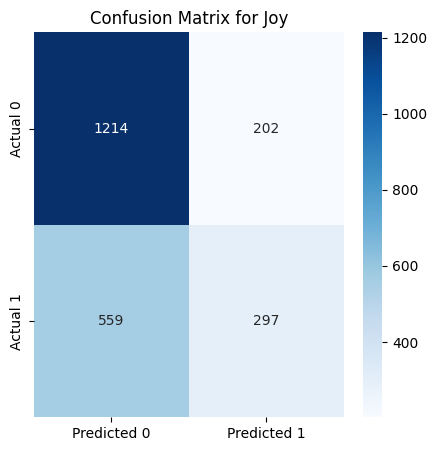

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


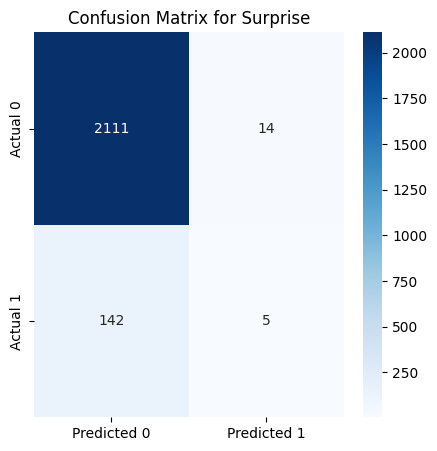

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


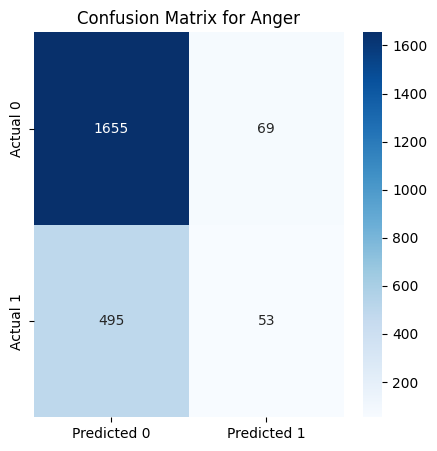

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


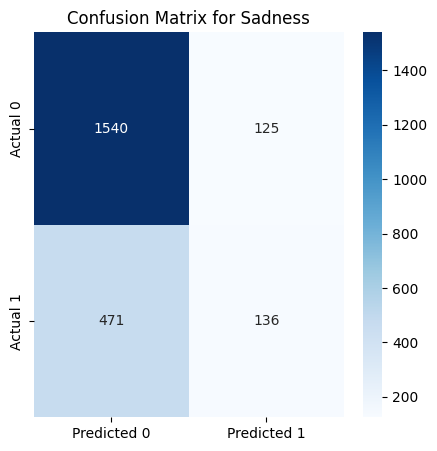

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


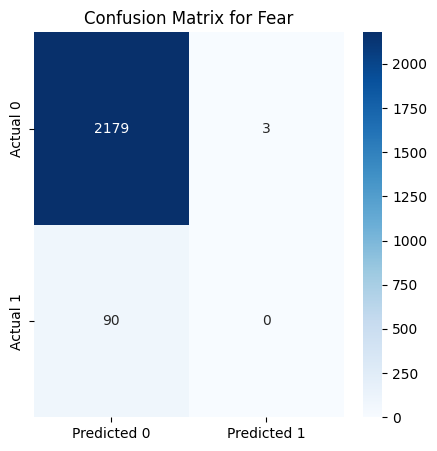


Metrics for Love:
Accuracy: 0.82
Precision (macro): 0.63
Precision (micro): 0.82
Precision (weighted): 0.77
Recall (macro): 0.55
Recall (micro): 0.82
Recall (weighted): 0.82
F1 Score (macro): 0.55
F1 Score (micro): 0.82
F1 Score (weighted): 0.78

Metrics for Joy:
Accuracy: 0.67
Precision (macro): 0.64
Precision (micro): 0.67
Precision (weighted): 0.65
Recall (macro): 0.60
Recall (micro): 0.67
Recall (weighted): 0.67
F1 Score (macro): 0.60
F1 Score (micro): 0.67
F1 Score (weighted): 0.64

Metrics for Surprise:
Accuracy: 0.93
Precision (macro): 0.60
Precision (micro): 0.93
Precision (weighted): 0.89
Recall (macro): 0.51
Recall (micro): 0.93
Recall (weighted): 0.93
F1 Score (macro): 0.51
F1 Score (micro): 0.93
F1 Score (weighted): 0.91

Metrics for Anger:
Accuracy: 0.75
Precision (macro): 0.60
Precision (micro): 0.75
Precision (weighted): 0.69
Recall (macro): 0.53
Recall (micro): 0.75
Recall (weighted): 0.75
F1 Score (macro): 0.51
F1 Score (micro): 0.75
F1 Score (weighted): 0.69

Metrics

In [16]:
#For Unigram PCA
feature_based(df_train1, df_test, c=10, x1=1, y1=1, gram="word", use_pca=True, n_components=100)

Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


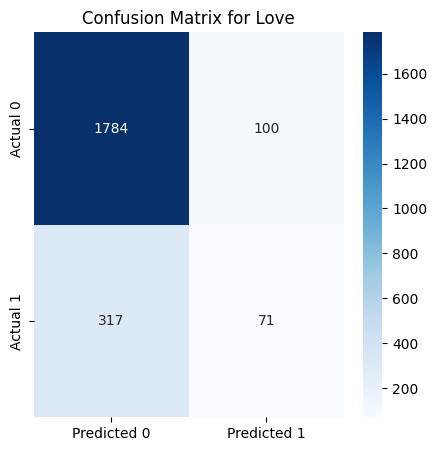

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


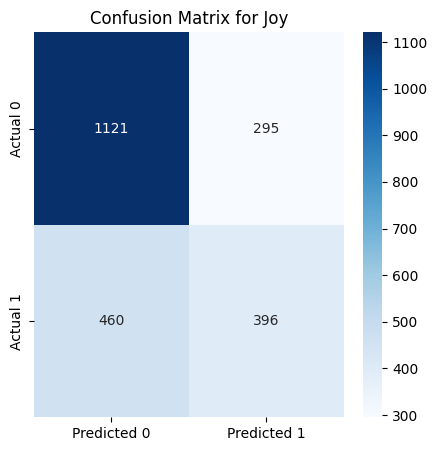

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


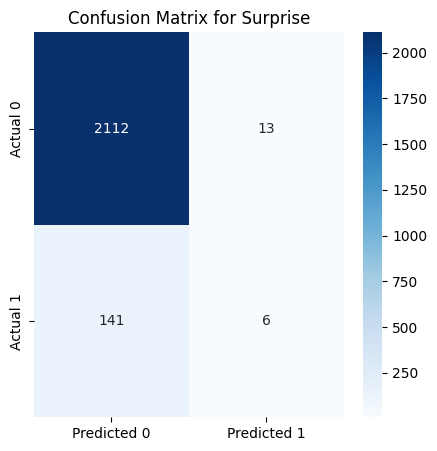

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


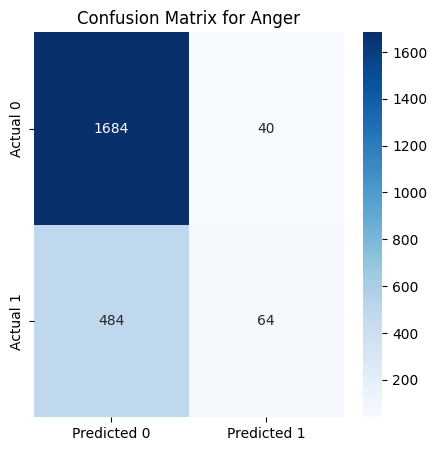

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


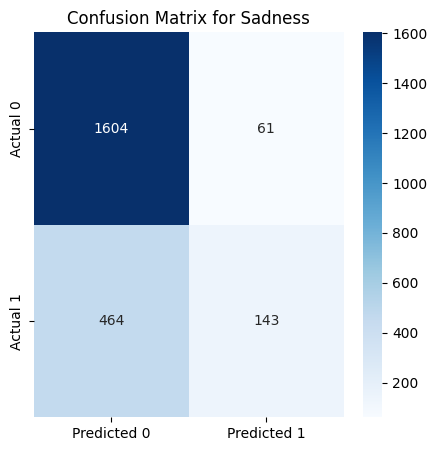

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


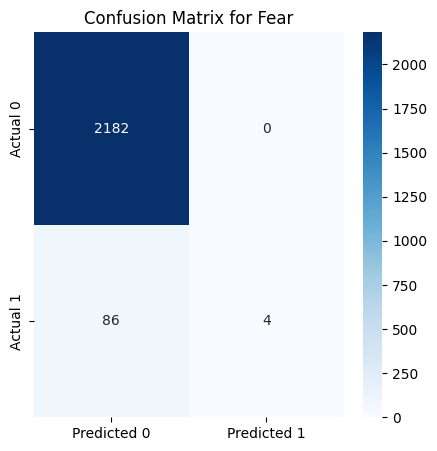


Metrics for Love:
Accuracy: 0.82
Precision (macro): 0.63
Precision (micro): 0.82
Precision (weighted): 0.78
Recall (macro): 0.56
Recall (micro): 0.82
Recall (weighted): 0.82
F1 Score (macro): 0.57
F1 Score (micro): 0.82
F1 Score (weighted): 0.79

Metrics for Joy:
Accuracy: 0.67
Precision (macro): 0.64
Precision (micro): 0.67
Precision (weighted): 0.66
Recall (macro): 0.63
Recall (micro): 0.67
Recall (weighted): 0.67
F1 Score (macro): 0.63
F1 Score (micro): 0.67
F1 Score (weighted): 0.66

Metrics for Surprise:
Accuracy: 0.93
Precision (macro): 0.63
Precision (micro): 0.93
Precision (weighted): 0.90
Recall (macro): 0.52
Recall (micro): 0.93
Recall (weighted): 0.93
F1 Score (macro): 0.52
F1 Score (micro): 0.93
F1 Score (weighted): 0.91

Metrics for Anger:
Accuracy: 0.77
Precision (macro): 0.70
Precision (micro): 0.77
Precision (weighted): 0.74
Recall (macro): 0.55
Recall (micro): 0.77
Recall (weighted): 0.77
F1 Score (macro): 0.53
F1 Score (micro): 0.77
F1 Score (weighted): 0.70

Metrics

In [17]:
#For unigram (without PCA)
feature_based(df_train1, df_test, c=10, x1=1, y1=1, gram="word", use_lda=False, n_components=None)

Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


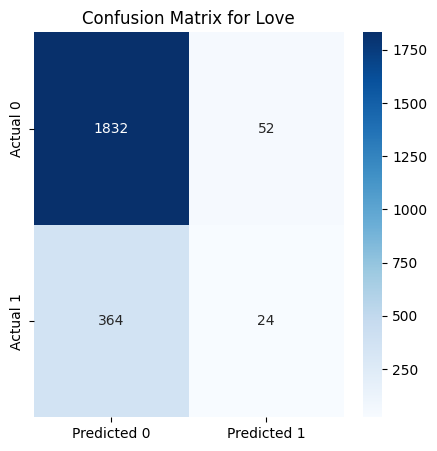

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


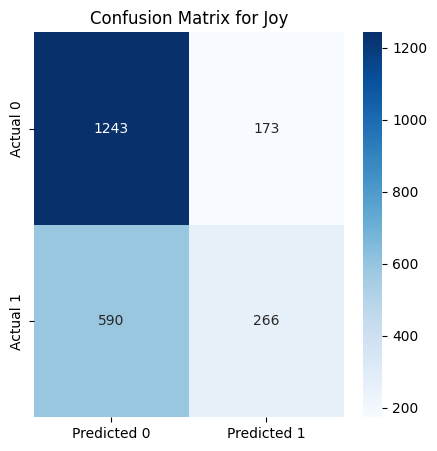

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


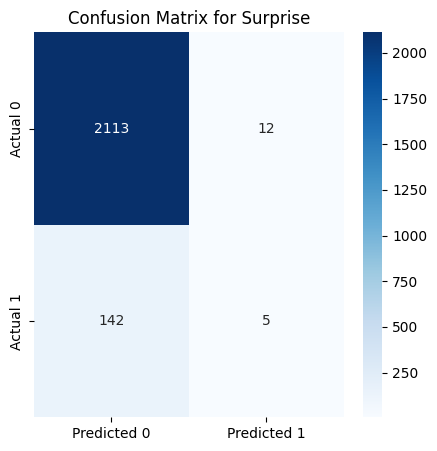

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


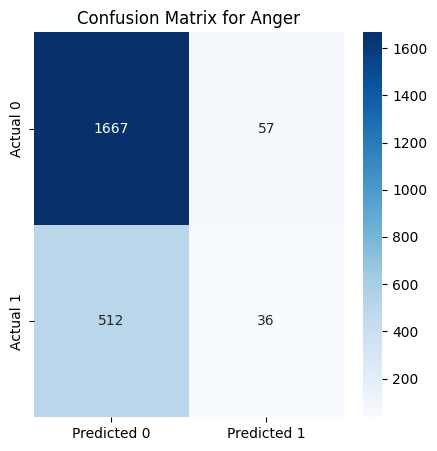

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


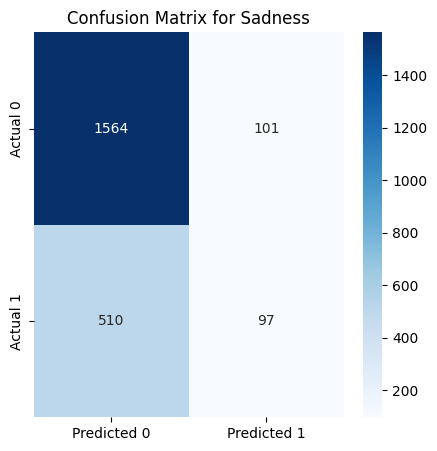

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


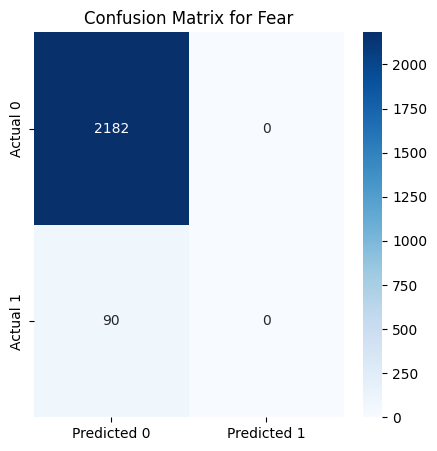


Metrics for Love:
Accuracy: 0.82
Precision (macro): 0.58
Precision (micro): 0.82
Precision (weighted): 0.75
Recall (macro): 0.52
Recall (micro): 0.82
Recall (weighted): 0.82
F1 Score (macro): 0.50
F1 Score (micro): 0.82
F1 Score (weighted): 0.76

Metrics for Joy:
Accuracy: 0.66
Precision (macro): 0.64
Precision (micro): 0.66
Precision (weighted): 0.65
Recall (macro): 0.59
Recall (micro): 0.66
Recall (weighted): 0.66
F1 Score (macro): 0.59
F1 Score (micro): 0.66
F1 Score (weighted): 0.63

Metrics for Surprise:
Accuracy: 0.93
Precision (macro): 0.62
Precision (micro): 0.93
Precision (weighted): 0.90
Recall (macro): 0.51
Recall (micro): 0.93
Recall (weighted): 0.93
F1 Score (macro): 0.51
F1 Score (micro): 0.93
F1 Score (weighted): 0.91

Metrics for Anger:
Accuracy: 0.75
Precision (macro): 0.58
Precision (micro): 0.75
Precision (weighted): 0.67
Recall (macro): 0.52
Recall (micro): 0.75
Recall (weighted): 0.75
F1 Score (macro): 0.48
F1 Score (micro): 0.75
F1 Score (weighted): 0.68

Metrics

In [18]:
#For Bigram PCA
feature_based(df_train1, df_test, c=10, x1=2, y1=2, gram="word", use_pca=True, n_components=100)

Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


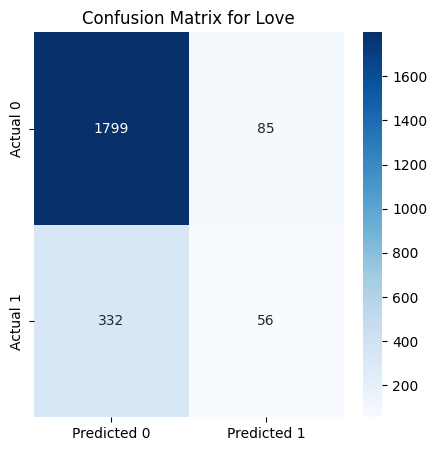

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


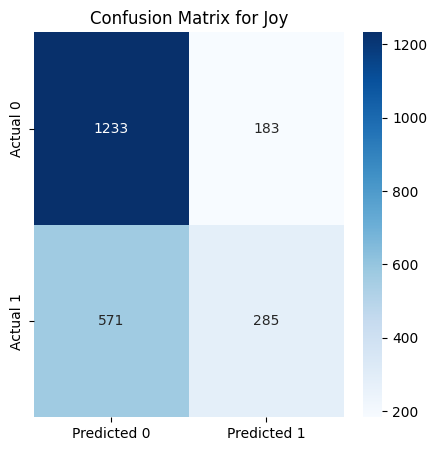

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


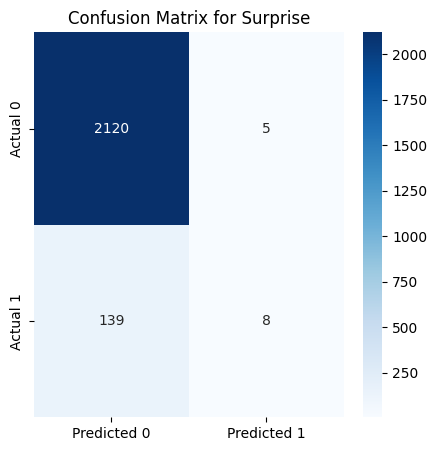

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


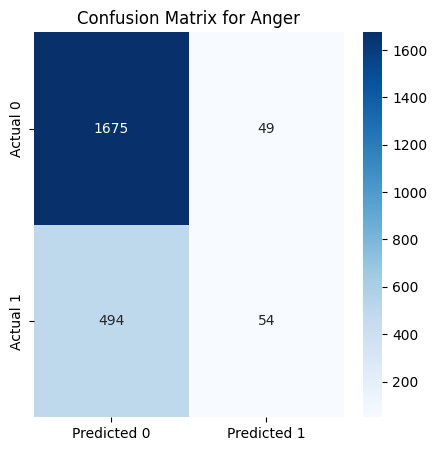

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


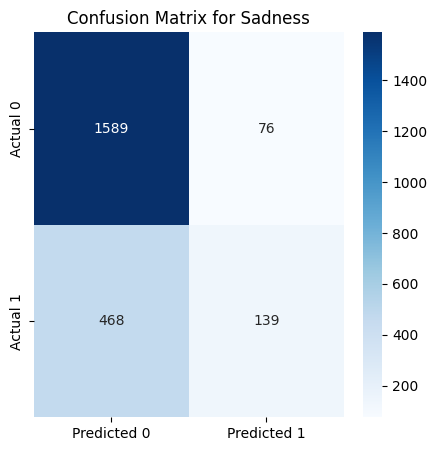

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


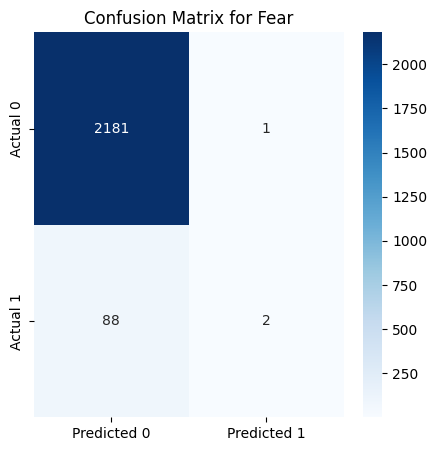


Metrics for Love:
Accuracy: 0.82
Precision (macro): 0.62
Precision (micro): 0.82
Precision (weighted): 0.77
Recall (macro): 0.55
Recall (micro): 0.82
Recall (weighted): 0.82
F1 Score (macro): 0.55
F1 Score (micro): 0.82
F1 Score (weighted): 0.78

Metrics for Joy:
Accuracy: 0.67
Precision (macro): 0.65
Precision (micro): 0.67
Precision (weighted): 0.66
Recall (macro): 0.60
Recall (micro): 0.67
Recall (weighted): 0.67
F1 Score (macro): 0.60
F1 Score (micro): 0.67
F1 Score (weighted): 0.64

Metrics for Surprise:
Accuracy: 0.94
Precision (macro): 0.78
Precision (micro): 0.94
Precision (weighted): 0.92
Recall (macro): 0.53
Recall (micro): 0.94
Recall (weighted): 0.94
F1 Score (macro): 0.53
F1 Score (micro): 0.94
F1 Score (weighted): 0.91

Metrics for Anger:
Accuracy: 0.76
Precision (macro): 0.65
Precision (micro): 0.76
Precision (weighted): 0.71
Recall (macro): 0.54
Recall (micro): 0.76
Recall (weighted): 0.76
F1 Score (macro): 0.51
F1 Score (micro): 0.76
F1 Score (weighted): 0.69

Metrics

In [19]:
#For Bigram (without PCA)
feature_based(df_train1, df_test, c=10, x1=2, y1=2, gram="word", use_lda=False, n_components=None)

Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


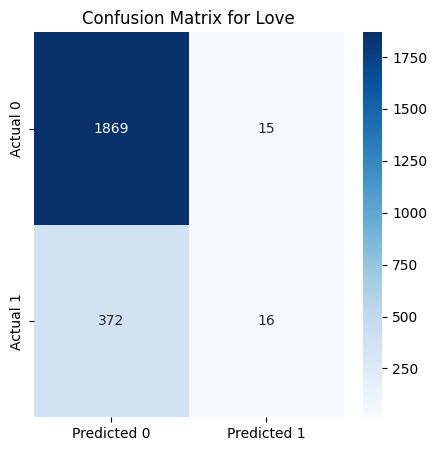

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


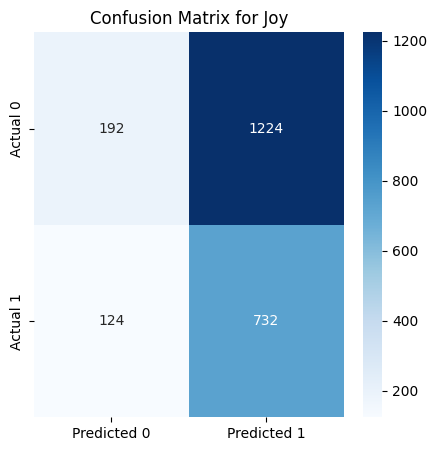

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


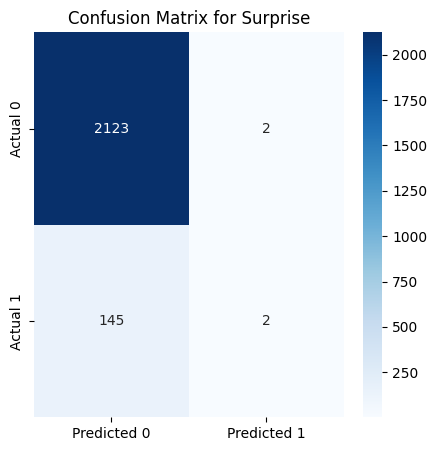

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


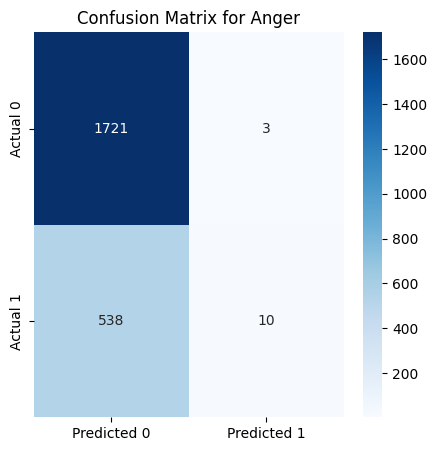

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


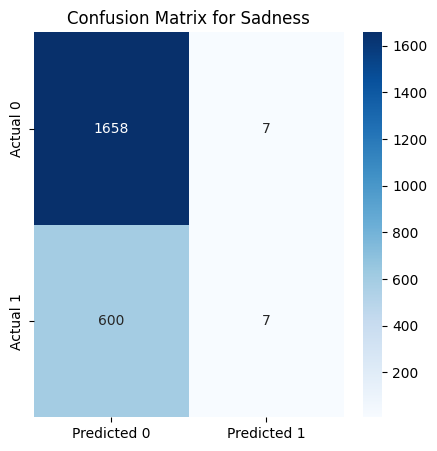

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


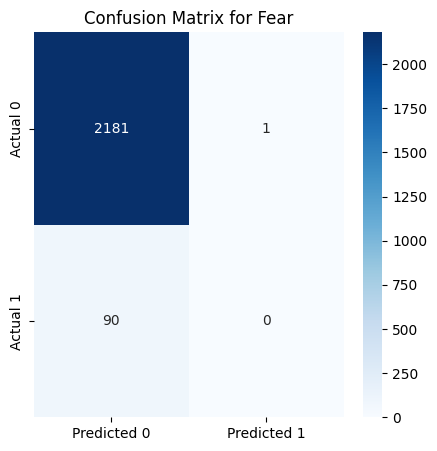


Metrics for Love:
Accuracy: 0.83
Precision (macro): 0.68
Precision (micro): 0.83
Precision (weighted): 0.78
Recall (macro): 0.52
Recall (micro): 0.83
Recall (weighted): 0.83
F1 Score (macro): 0.49
F1 Score (micro): 0.83
F1 Score (weighted): 0.76

Metrics for Joy:
Accuracy: 0.41
Precision (macro): 0.49
Precision (micro): 0.41
Precision (weighted): 0.52
Recall (macro): 0.50
Recall (micro): 0.41
Recall (weighted): 0.41
F1 Score (macro): 0.37
F1 Score (micro): 0.41
F1 Score (weighted): 0.33

Metrics for Surprise:
Accuracy: 0.94
Precision (macro): 0.72
Precision (micro): 0.94
Precision (weighted): 0.91
Recall (macro): 0.51
Recall (micro): 0.94
Recall (weighted): 0.94
F1 Score (macro): 0.50
F1 Score (micro): 0.94
F1 Score (weighted): 0.91

Metrics for Anger:
Accuracy: 0.76
Precision (macro): 0.77
Precision (micro): 0.76
Precision (weighted): 0.76
Recall (macro): 0.51
Recall (micro): 0.76
Recall (weighted): 0.76
F1 Score (macro): 0.45
F1 Score (micro): 0.76
F1 Score (weighted): 0.66

Metrics

In [20]:
#For Trigram PCA
feature_based(df_train1, df_test, c=10, x1=3, y1=3, gram="word", use_pca=True, n_components=100)

Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


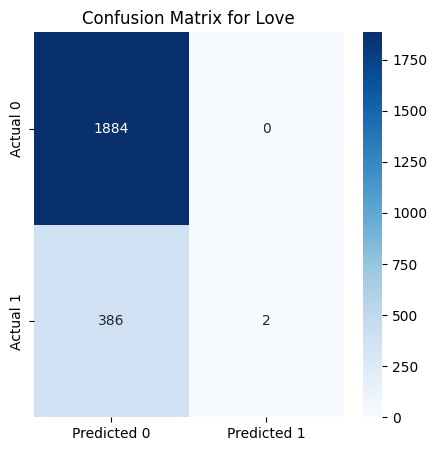

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


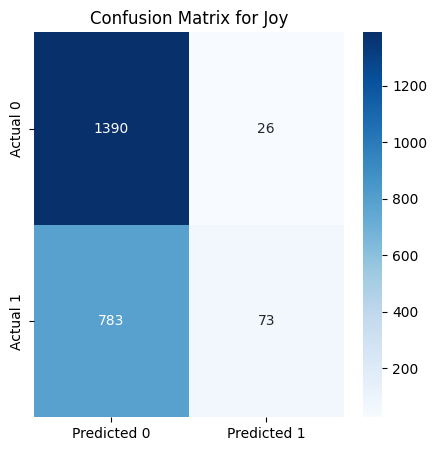

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


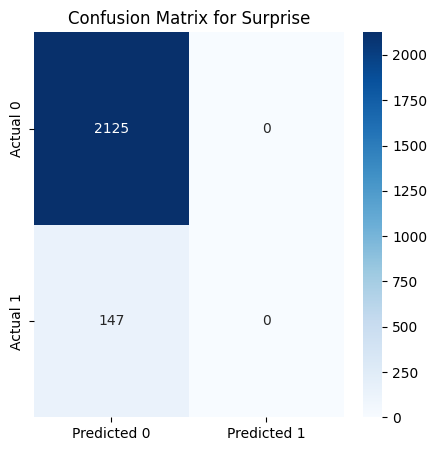

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


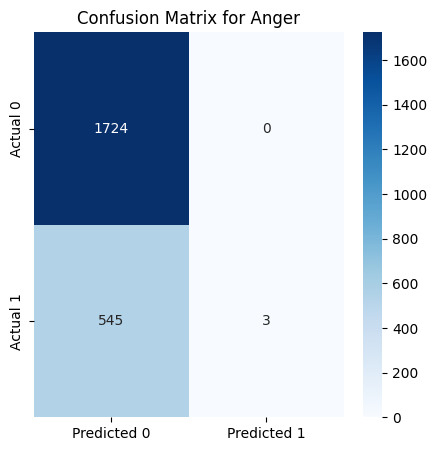

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


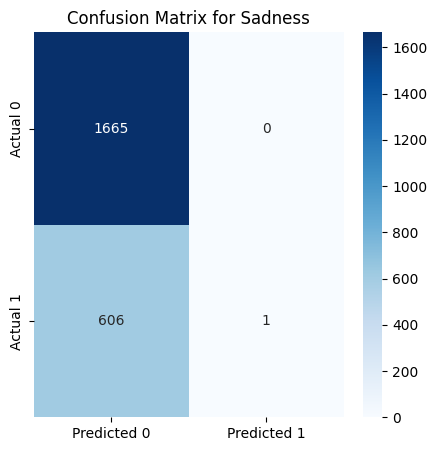

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


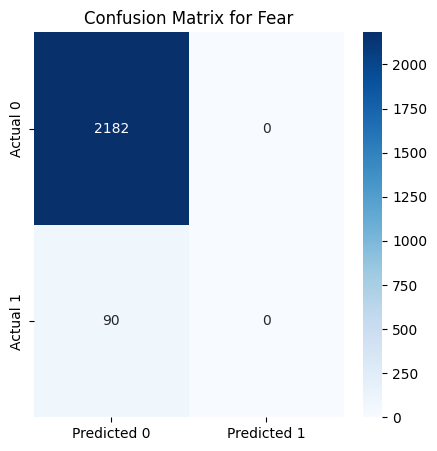


Metrics for Love:
Accuracy: 0.83
Precision (macro): 0.91
Precision (micro): 0.83
Precision (weighted): 0.86
Recall (macro): 0.50
Recall (micro): 0.83
Recall (weighted): 0.83
F1 Score (macro): 0.46
F1 Score (micro): 0.83
F1 Score (weighted): 0.75

Metrics for Joy:
Accuracy: 0.64
Precision (macro): 0.69
Precision (micro): 0.64
Precision (weighted): 0.68
Recall (macro): 0.53
Recall (micro): 0.64
Recall (weighted): 0.64
F1 Score (macro): 0.46
F1 Score (micro): 0.64
F1 Score (weighted): 0.54

Metrics for Surprise:
Accuracy: 0.94
Precision (macro): 0.47
Precision (micro): 0.94
Precision (weighted): 0.87
Recall (macro): 0.50
Recall (micro): 0.94
Recall (weighted): 0.94
F1 Score (macro): 0.48
F1 Score (micro): 0.94
F1 Score (weighted): 0.90

Metrics for Anger:
Accuracy: 0.76
Precision (macro): 0.88
Precision (micro): 0.76
Precision (weighted): 0.82
Recall (macro): 0.50
Recall (micro): 0.76
Recall (weighted): 0.76
F1 Score (macro): 0.44
F1 Score (micro): 0.76
F1 Score (weighted): 0.66

Metrics

In [21]:
#For Trigram (without PCA)
feature_based(df_train1, df_test, c=10, x1=3, y1=3, gram="word", use_lda=False, n_components=None)

#Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
def feature_based(train, test, c, x1, y1, gram, use_pca=False, use_lda=False, n_components=None):
    emotions = ["Love", "Joy", "Surprise", "Anger", "Sadness", "Fear"]
    metrics_dic = dict()

    for emotion in emotions:
        print(f"Evaluating for emotion: {emotion}")
        trainData = train['Data']
        trainLabel = train[emotion]
        testData = test['Data']
        testLabel = test[emotion].tolist()

        tfidf_vect_ngram = TfidfVectorizer(analyzer=gram, ngram_range=(x1, y1), tokenizer=lambda x: x.split())
        tfidf_vect_ngram.fit(trainData)
        xtrain_tfidf = tfidf_vect_ngram.transform(trainData)
        xtest_tfidf = tfidf_vect_ngram.transform(testData)

        if use_pca:
            pca = PCA(n_components=n_components)
            xtrain = pca.fit_transform(xtrain_tfidf.toarray())
            xtest = pca.transform(xtest_tfidf.toarray())
        elif use_lda:
            lda = LDA(n_components=n_components)
            xtrain = lda.fit_transform(xtrain_tfidf.toarray(), trainLabel)
            xtest = lda.transform(xtest_tfidf.toarray())
        else:
            xtrain = xtrain_tfidf.toarray()
            xtest = xtest_tfidf.toarray()

        rf = RandomForestClassifier(n_estimators=c, random_state=42)
        rf.fit(xtrain, trainLabel)
        pred_test = rf.predict(xtest)

        # Compute metrics with macro, micro, and weighted averages
        metrics_dic[emotion] = {
            'Accuracy': accuracy_score(testLabel, pred_test),
            'Precision (macro)': precision_score(testLabel, pred_test, average='macro'),
            'Precision (micro)': precision_score(testLabel, pred_test, average='micro'),
            'Precision (weighted)': precision_score(testLabel, pred_test, average='weighted'),
            'Recall (macro)': recall_score(testLabel, pred_test, average='macro'),
            'Recall (micro)': recall_score(testLabel, pred_test, average='micro'),
            'Recall (weighted)': recall_score(testLabel, pred_test, average='weighted'),
            'F1 Score (macro)': f1_score(testLabel, pred_test, average='macro'),
            'F1 Score (micro)': f1_score(testLabel, pred_test, average='micro'),
            'F1 Score (weighted)': f1_score(testLabel, pred_test, average='weighted'),
        }

        # Visualize the confusion matrix
        cm = confusion_matrix(testLabel, pred_test)
        plt.figure(figsize=(5, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
        plt.title(f'Confusion Matrix for {emotion}')
        plt.show()

    # Print metrics
    for emotion, scores in metrics_dic.items():
        print(f"\nMetrics for {emotion}:")
        for metric_name, metric_value in scores.items():
            print(f"{metric_name}: {metric_value:.2f}")

    # Calculate and print Macro Average F1-score across all emotions
    macro_avg_f1 = np.mean([score['F1 Score (macro)'] for score in metrics_dic.values()])
    print("\nMacro Average F1-score (across emotions): ", float('{:.2f}'.format(macro_avg_f1)))

Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


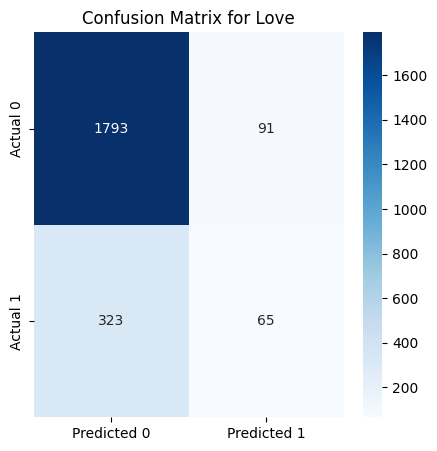

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


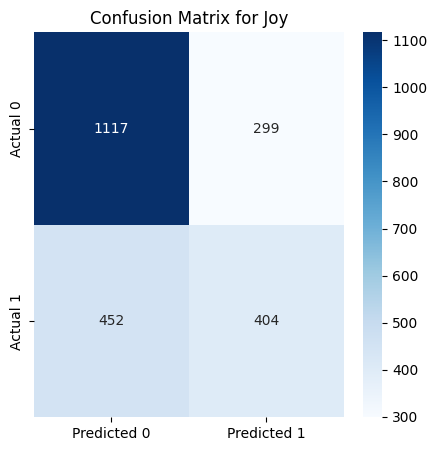

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


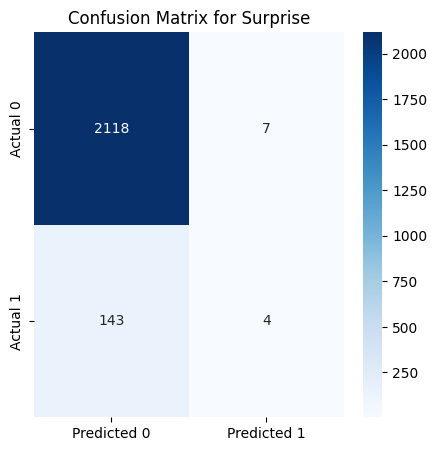

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


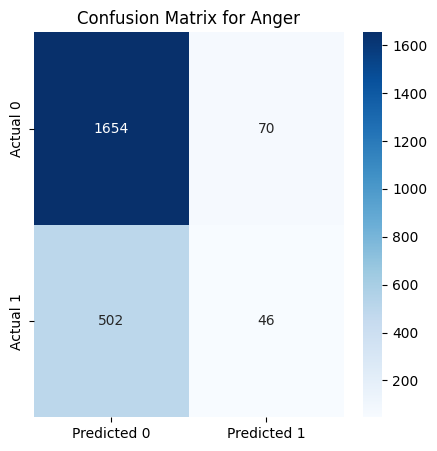

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


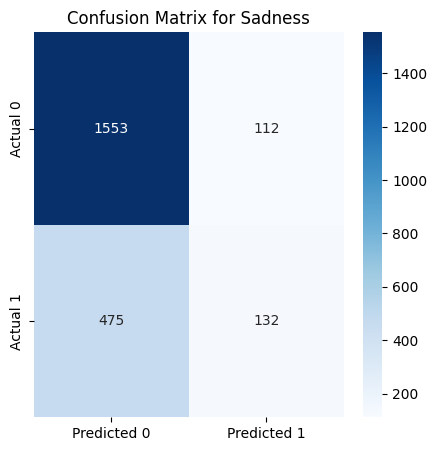

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


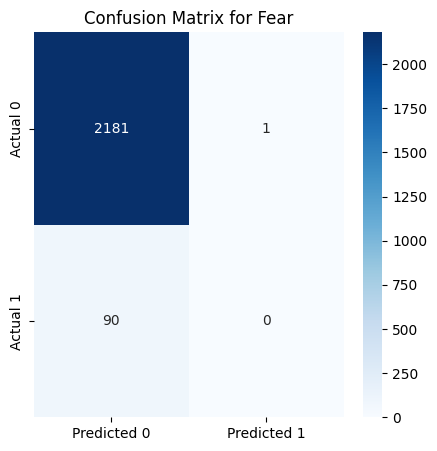


Metrics for Love:
Accuracy: 0.82
Precision (macro): 0.63
Precision (micro): 0.82
Precision (weighted): 0.77
Recall (macro): 0.56
Recall (micro): 0.82
Recall (weighted): 0.82
F1 Score (macro): 0.57
F1 Score (micro): 0.82
F1 Score (weighted): 0.78

Metrics for Joy:
Accuracy: 0.67
Precision (macro): 0.64
Precision (micro): 0.67
Precision (weighted): 0.66
Recall (macro): 0.63
Recall (micro): 0.67
Recall (weighted): 0.67
F1 Score (macro): 0.63
F1 Score (micro): 0.67
F1 Score (weighted): 0.66

Metrics for Surprise:
Accuracy: 0.93
Precision (macro): 0.65
Precision (micro): 0.93
Precision (weighted): 0.90
Recall (macro): 0.51
Recall (micro): 0.93
Recall (weighted): 0.93
F1 Score (macro): 0.51
F1 Score (micro): 0.93
F1 Score (weighted): 0.91

Metrics for Anger:
Accuracy: 0.75
Precision (macro): 0.58
Precision (micro): 0.75
Precision (weighted): 0.68
Recall (macro): 0.52
Recall (micro): 0.75
Recall (weighted): 0.75
F1 Score (macro): 0.50
F1 Score (micro): 0.75
F1 Score (weighted): 0.68

Metrics

In [27]:
#For Unigram PCA
feature_based(df_train1, df_test, c=10, x1=1, y1=1, gram="word", use_pca=True, n_components=100)

Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


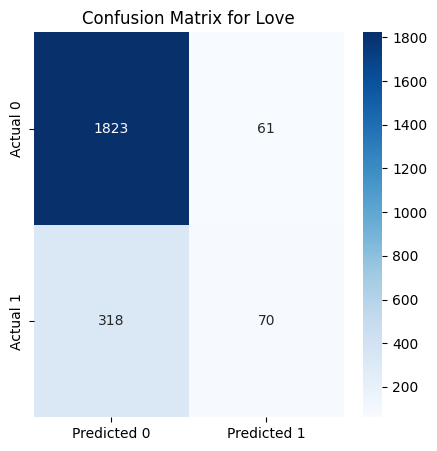

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


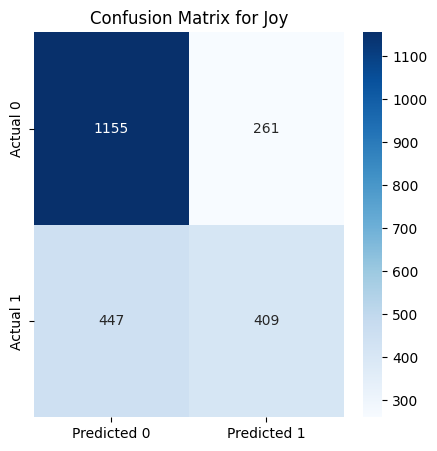

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


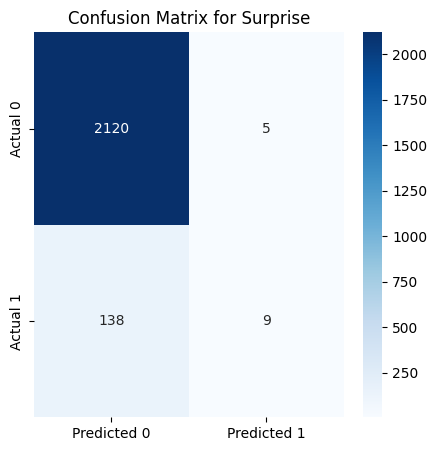

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


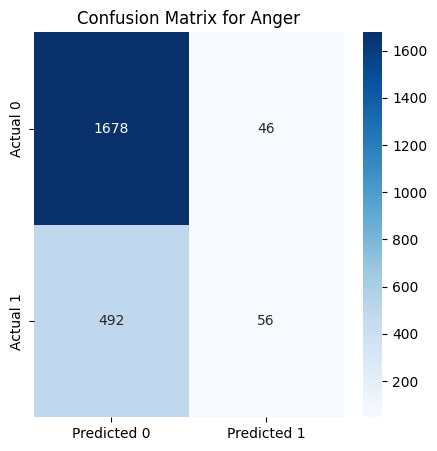

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


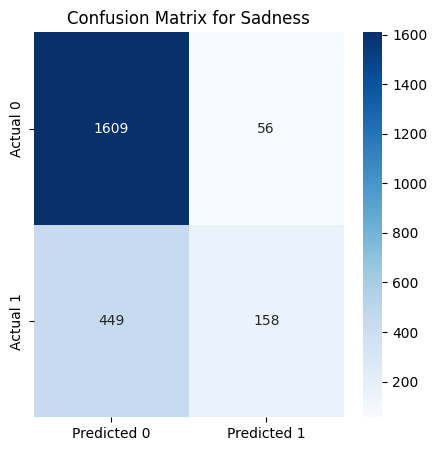

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


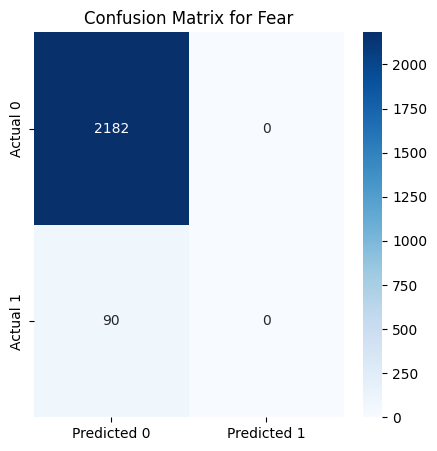


Metrics for Love:
Accuracy: 0.83
Precision (macro): 0.69
Precision (micro): 0.83
Precision (weighted): 0.80
Recall (macro): 0.57
Recall (micro): 0.83
Recall (weighted): 0.83
F1 Score (macro): 0.59
F1 Score (micro): 0.83
F1 Score (weighted): 0.80

Metrics for Joy:
Accuracy: 0.69
Precision (macro): 0.67
Precision (micro): 0.69
Precision (weighted): 0.68
Recall (macro): 0.65
Recall (micro): 0.69
Recall (weighted): 0.69
F1 Score (macro): 0.65
F1 Score (micro): 0.69
F1 Score (weighted): 0.68

Metrics for Surprise:
Accuracy: 0.94
Precision (macro): 0.79
Precision (micro): 0.94
Precision (weighted): 0.92
Recall (macro): 0.53
Recall (micro): 0.94
Recall (weighted): 0.94
F1 Score (macro): 0.54
F1 Score (micro): 0.94
F1 Score (weighted): 0.91

Metrics for Anger:
Accuracy: 0.76
Precision (macro): 0.66
Precision (micro): 0.76
Precision (weighted): 0.72
Recall (macro): 0.54
Recall (micro): 0.76
Recall (weighted): 0.76
F1 Score (macro): 0.52
F1 Score (micro): 0.76
F1 Score (weighted): 0.70

Metrics

In [28]:
#For unigram (without PCA)
feature_based(df_train1, df_test, c=10, x1=1, y1=1, gram="word", use_lda=False, n_components=None)

Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


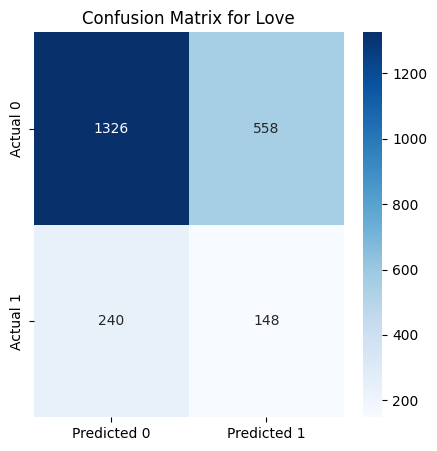

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


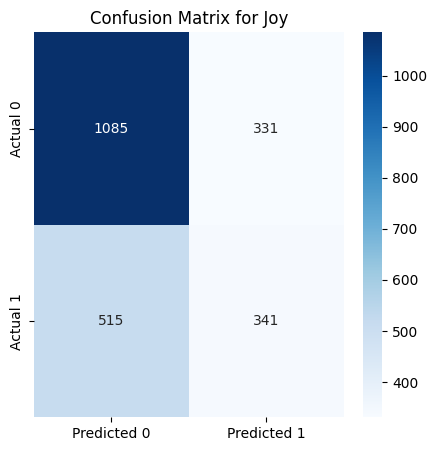

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


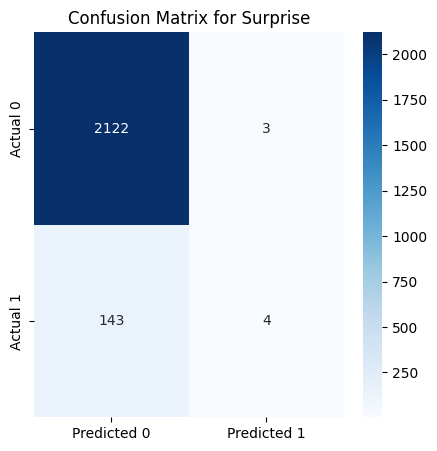

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


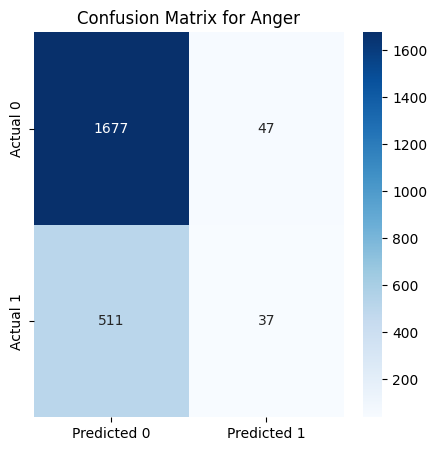

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


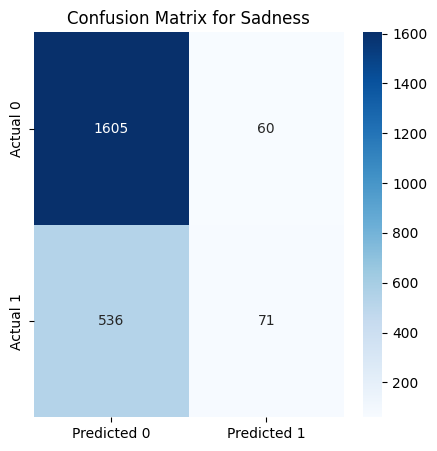

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


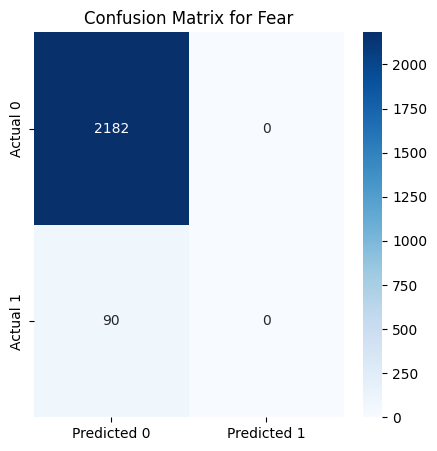


Metrics for Love:
Accuracy: 0.65
Precision (macro): 0.53
Precision (micro): 0.65
Precision (weighted): 0.74
Recall (macro): 0.54
Recall (micro): 0.65
Recall (weighted): 0.65
F1 Score (macro): 0.52
F1 Score (micro): 0.65
F1 Score (weighted): 0.68

Metrics for Joy:
Accuracy: 0.63
Precision (macro): 0.59
Precision (micro): 0.63
Precision (weighted): 0.61
Recall (macro): 0.58
Recall (micro): 0.63
Recall (weighted): 0.63
F1 Score (macro): 0.58
F1 Score (micro): 0.63
F1 Score (weighted): 0.62

Metrics for Surprise:
Accuracy: 0.94
Precision (macro): 0.75
Precision (micro): 0.94
Precision (weighted): 0.91
Recall (macro): 0.51
Recall (micro): 0.94
Recall (weighted): 0.94
F1 Score (macro): 0.51
F1 Score (micro): 0.94
F1 Score (weighted): 0.91

Metrics for Anger:
Accuracy: 0.75
Precision (macro): 0.60
Precision (micro): 0.75
Precision (weighted): 0.69
Recall (macro): 0.52
Recall (micro): 0.75
Recall (weighted): 0.75
F1 Score (macro): 0.49
F1 Score (micro): 0.75
F1 Score (weighted): 0.68

Metrics

In [29]:
#For Bigram PCA
feature_based(df_train1, df_test, c=10, x1=2, y1=2, gram="word", use_pca=True, n_components=100)

Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


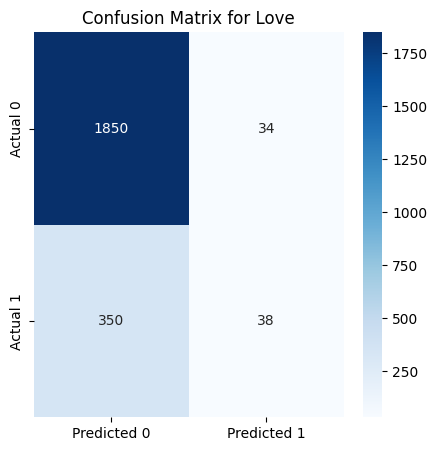

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


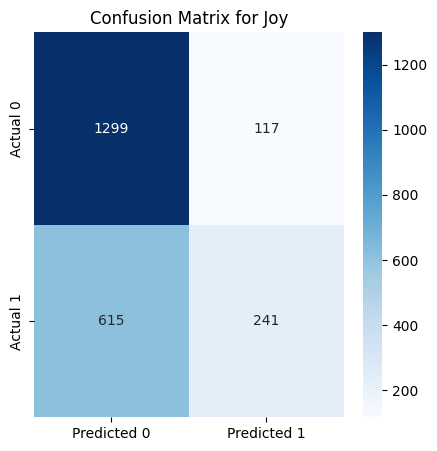

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


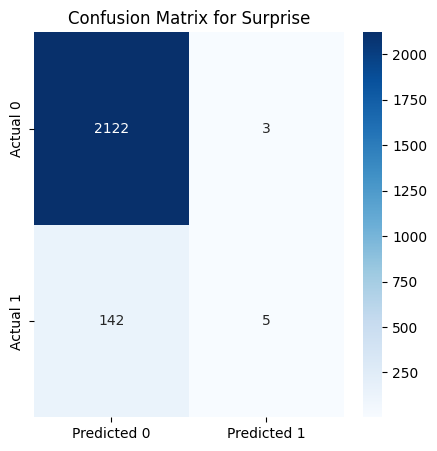

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


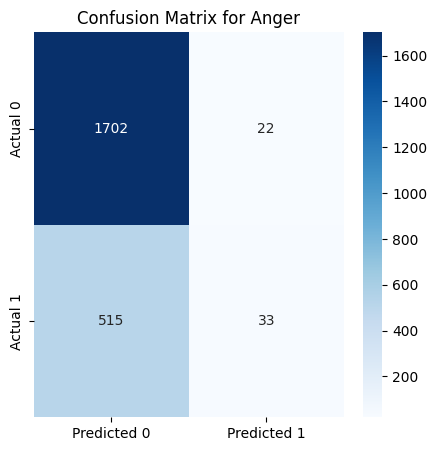

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


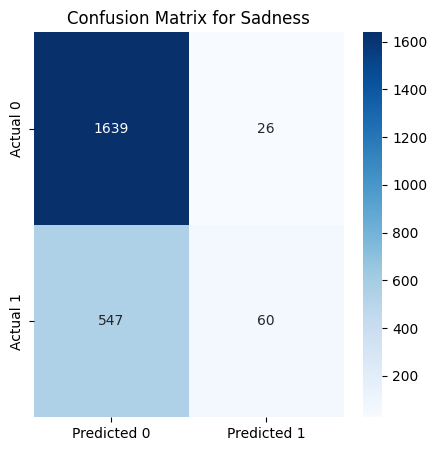

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


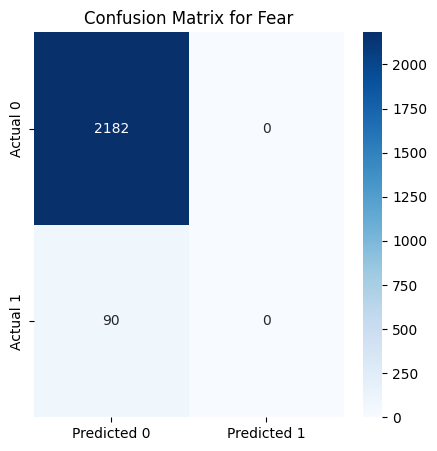


Metrics for Love:
Accuracy: 0.83
Precision (macro): 0.68
Precision (micro): 0.83
Precision (weighted): 0.79
Recall (macro): 0.54
Recall (micro): 0.83
Recall (weighted): 0.83
F1 Score (macro): 0.54
F1 Score (micro): 0.83
F1 Score (weighted): 0.78

Metrics for Joy:
Accuracy: 0.68
Precision (macro): 0.68
Precision (micro): 0.68
Precision (weighted): 0.68
Recall (macro): 0.60
Recall (micro): 0.68
Recall (weighted): 0.68
F1 Score (macro): 0.59
F1 Score (micro): 0.68
F1 Score (weighted): 0.64

Metrics for Surprise:
Accuracy: 0.94
Precision (macro): 0.78
Precision (micro): 0.94
Precision (weighted): 0.92
Recall (macro): 0.52
Recall (micro): 0.94
Recall (weighted): 0.94
F1 Score (macro): 0.52
F1 Score (micro): 0.94
F1 Score (weighted): 0.91

Metrics for Anger:
Accuracy: 0.76
Precision (macro): 0.68
Precision (micro): 0.76
Precision (weighted): 0.73
Recall (macro): 0.52
Recall (micro): 0.76
Recall (weighted): 0.76
F1 Score (macro): 0.49
F1 Score (micro): 0.76
F1 Score (weighted): 0.68

Metrics

In [30]:
#For Bigram (without PCA)
feature_based(df_train1, df_test, c=10, x1=2, y1=2, gram="word", use_lda=False, n_components=None)

Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


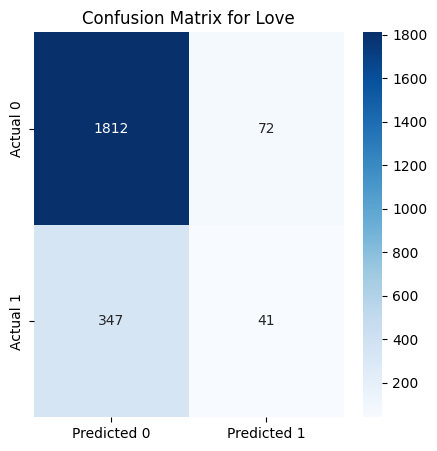

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


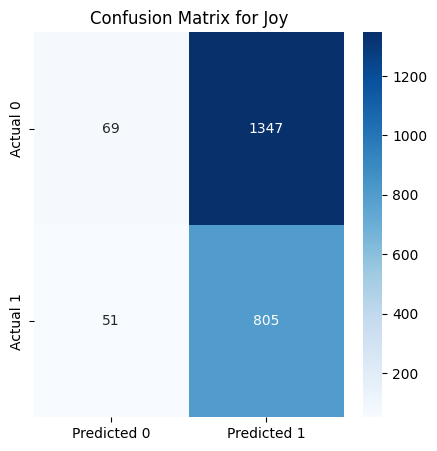

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


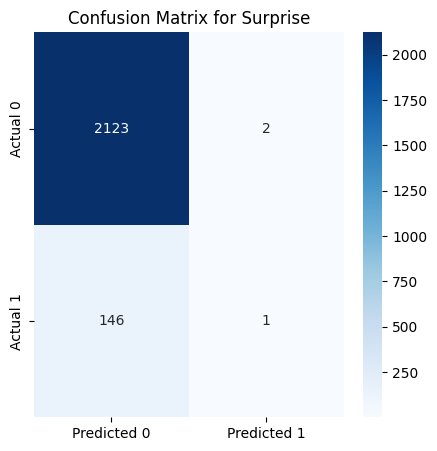

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


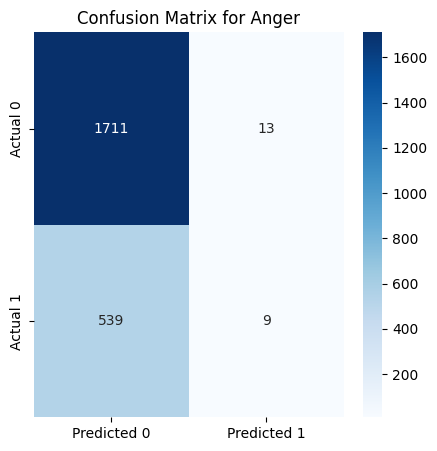

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


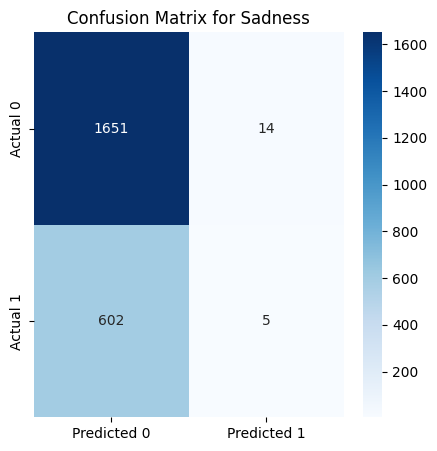

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


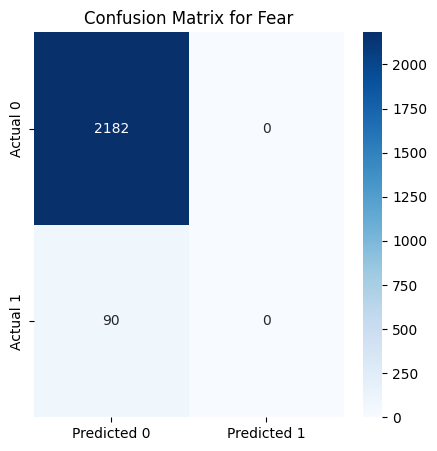


Metrics for Love:
Accuracy: 0.82
Precision (macro): 0.60
Precision (micro): 0.82
Precision (weighted): 0.76
Recall (macro): 0.53
Recall (micro): 0.82
Recall (weighted): 0.82
F1 Score (macro): 0.53
F1 Score (micro): 0.82
F1 Score (weighted): 0.77

Metrics for Joy:
Accuracy: 0.38
Precision (macro): 0.47
Precision (micro): 0.38
Precision (weighted): 0.50
Recall (macro): 0.49
Recall (micro): 0.38
Recall (weighted): 0.38
F1 Score (macro): 0.31
F1 Score (micro): 0.38
F1 Score (weighted): 0.26

Metrics for Surprise:
Accuracy: 0.93
Precision (macro): 0.63
Precision (micro): 0.93
Precision (weighted): 0.90
Recall (macro): 0.50
Recall (micro): 0.93
Recall (weighted): 0.93
F1 Score (macro): 0.49
F1 Score (micro): 0.93
F1 Score (weighted): 0.90

Metrics for Anger:
Accuracy: 0.76
Precision (macro): 0.58
Precision (micro): 0.76
Precision (weighted): 0.68
Recall (macro): 0.50
Recall (micro): 0.76
Recall (weighted): 0.76
F1 Score (macro): 0.45
F1 Score (micro): 0.76
F1 Score (weighted): 0.66

Metrics

In [31]:
#For Trigram PCA
feature_based(df_train1, df_test, c=10, x1=3, y1=3, gram="word", use_pca=True, n_components=100)

Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


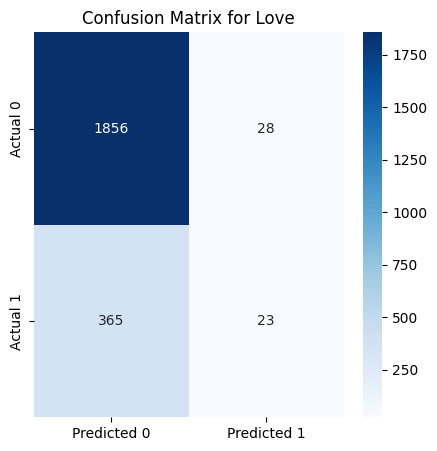

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


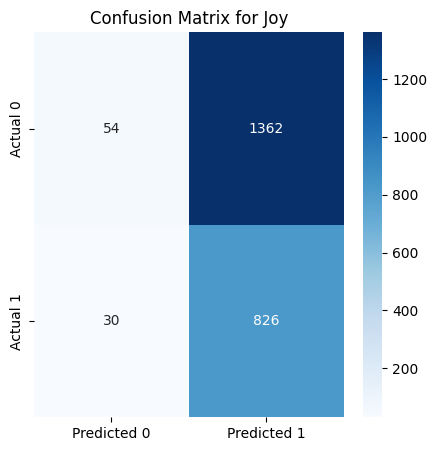

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


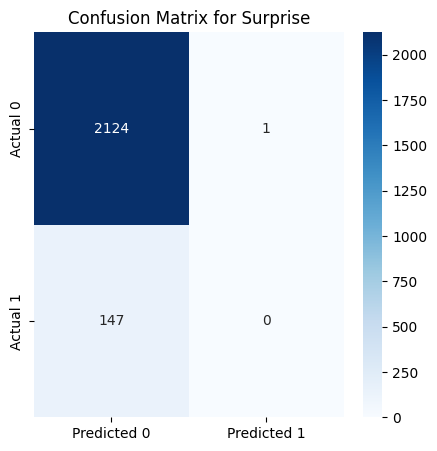

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


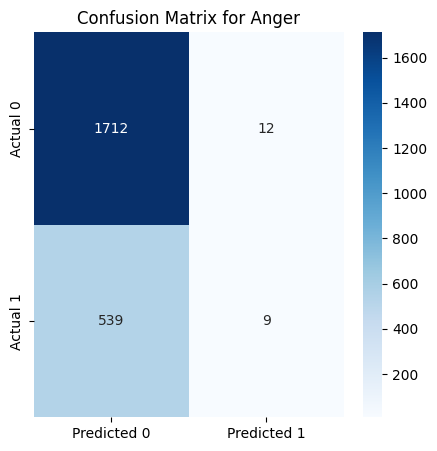

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


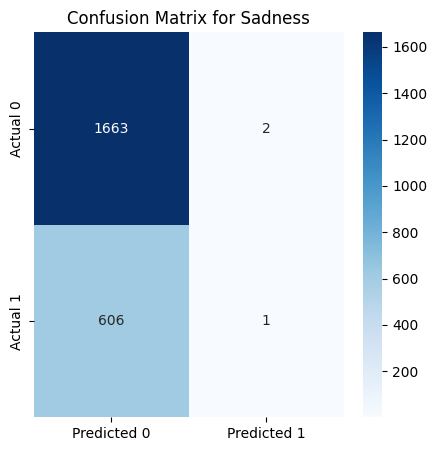

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


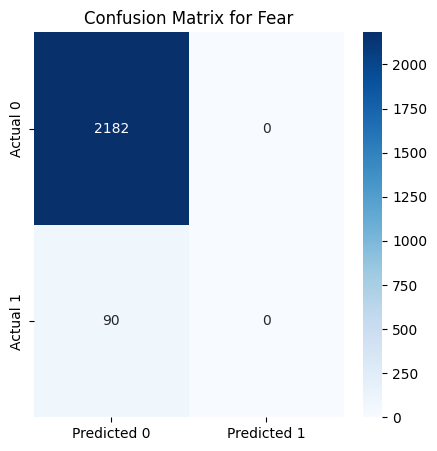


Metrics for Love:
Accuracy: 0.83
Precision (macro): 0.64
Precision (micro): 0.83
Precision (weighted): 0.77
Recall (macro): 0.52
Recall (micro): 0.83
Recall (weighted): 0.83
F1 Score (macro): 0.50
F1 Score (micro): 0.83
F1 Score (weighted): 0.77

Metrics for Joy:
Accuracy: 0.39
Precision (macro): 0.51
Precision (micro): 0.39
Precision (weighted): 0.54
Recall (macro): 0.50
Recall (micro): 0.39
Recall (weighted): 0.39
F1 Score (macro): 0.31
F1 Score (micro): 0.39
F1 Score (weighted): 0.25

Metrics for Surprise:
Accuracy: 0.93
Precision (macro): 0.47
Precision (micro): 0.93
Precision (weighted): 0.87
Recall (macro): 0.50
Recall (micro): 0.93
Recall (weighted): 0.93
F1 Score (macro): 0.48
F1 Score (micro): 0.93
F1 Score (weighted): 0.90

Metrics for Anger:
Accuracy: 0.76
Precision (macro): 0.59
Precision (micro): 0.76
Precision (weighted): 0.68
Recall (macro): 0.50
Recall (micro): 0.76
Recall (weighted): 0.76
F1 Score (macro): 0.45
F1 Score (micro): 0.76
F1 Score (weighted): 0.66

Metrics

In [32]:
#For Trigram (without PCA)
feature_based(df_train1, df_test, c=10, x1=3, y1=3, gram="word", use_lda=False, n_components=None)

#Without ADABOOST (DT)

In [53]:
def feature_based_without_adaboost(train, test, x1, y1, gram):
    emotions = ["Love", "Joy", "Surprise", "Anger", "Sadness", "Fear"]
    f1_dic = {}

    for emotion in emotions:
        print(f"Evaluating for emotion: {emotion}")
        trainData = train['Data']
        trainLabel = train[emotion]
        testData = test['Data']
        testLabel = test[emotion]

        # Vectorize text data
        tfidf_vect_ngram = TfidfVectorizer(analyzer=gram, ngram_range=(x1, y1), tokenizer=lambda x: x.split())
        xtrain_tfidf = tfidf_vect_ngram.fit_transform(trainData)
        xtest_tfidf = tfidf_vect_ngram.transform(testData)

        # Initialize a Decision Tree Classifier
        decision_tree = DecisionTreeClassifier(random_state=42)

        # Train Decision Tree model
        decision_tree.fit(xtrain_tfidf, trainLabel)

        # Make predictions
        pred_test = decision_tree.predict(xtest_tfidf)

        # Calculate F1 score
        f1 = f1_score(testLabel, pred_test, average='weighted')
        f1_dic[emotion] = round(f1 * 100, 2)

        # Calculate and plot confusion matrix
        cm = confusion_matrix(testLabel, pred_test)
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d')
        plt.title(f'Confusion Matrix for {emotion}')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

    print(f1_dic)
    # Calculate and print Macro Average F1-score
    macro_avg_f1 = np.mean(list(f1_dic.values()))
    print("Macro Average F1-score: ", round(macro_avg_f1, 2))

Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


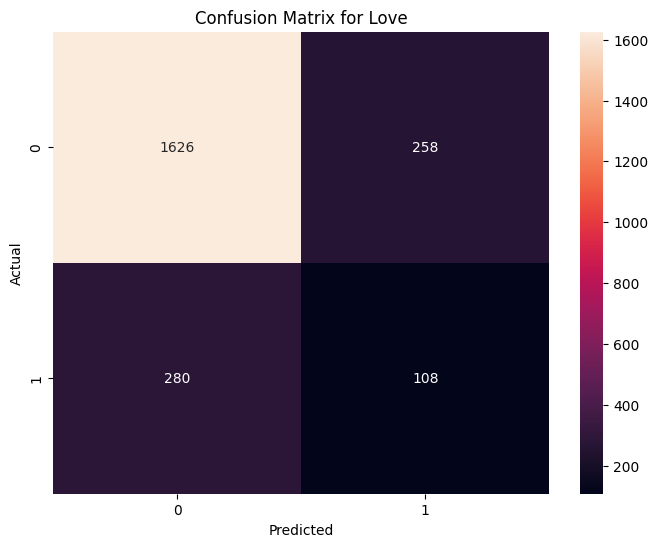

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


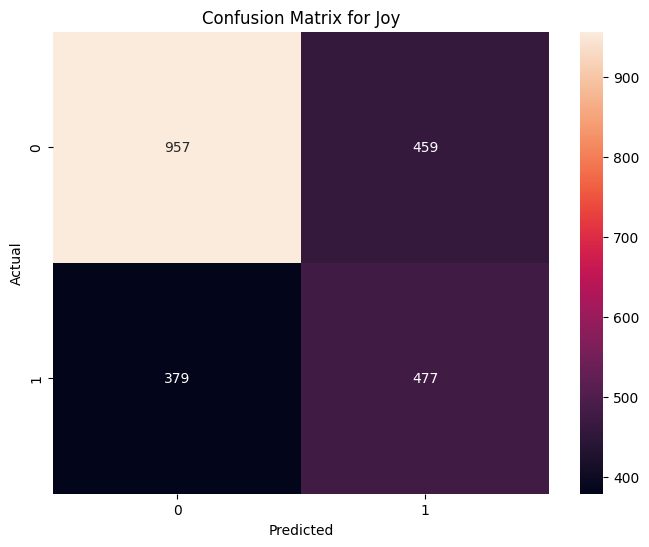

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


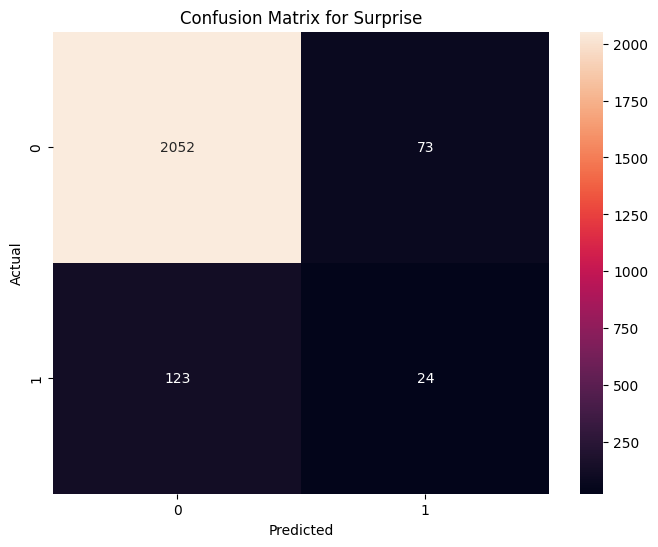

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


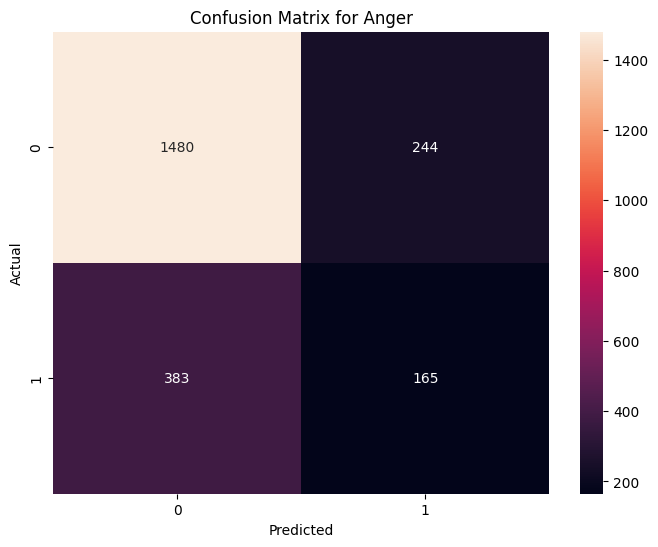

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


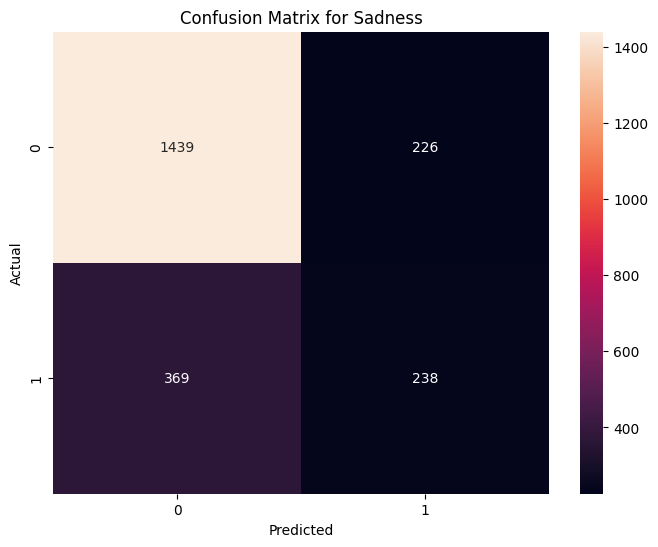

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


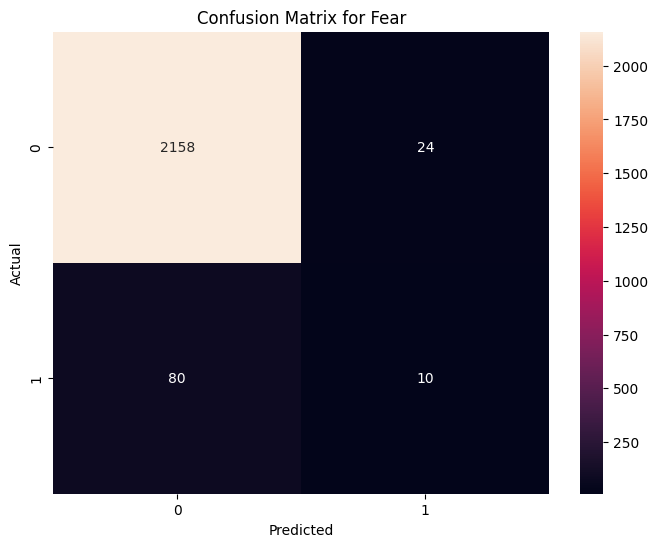

{'Love': 76.04, 'Joy': 63.4, 'Surprise': 90.54, 'Anger': 70.93, 'Sadness': 72.6, 'Fear': 94.42}
Macro Average F1-score:  77.99


In [54]:
feature_based_without_adaboost(df_train1, df_test, x1=1, y1=1, gram="word")

#For ADA BOOST (Decision TREE)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
def feature_based_with_adaboost(train, test, x1, y1, gram, n_estimators=50, learning_rate=1.0):
    emotions = ["Love", "Joy", "Surprise", "Anger", "Sadness", "Fear"]
    f1_dic = {}

    for emotion in emotions:
        print(f"Evaluating for emotion: {emotion}")
        trainData = train['Data']
        trainLabel = train[emotion]
        testData = test['Data']
        testLabel = test[emotion]

        # Vectorize text data
        tfidf_vect_ngram = TfidfVectorizer(analyzer=gram, ngram_range=(x1, y1), tokenizer=lambda x: x.split())
        xtrain_tfidf = tfidf_vect_ngram.fit_transform(trainData)
        xtest_tfidf = tfidf_vect_ngram.transform(testData)

        # Initialize AdaBoostClassifier with a DecisionTreeClassifier as the base estimator
        ada_boost = AdaBoostClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=42
        )

        # Train AdaBoost model
        ada_boost.fit(xtrain_tfidf, trainLabel)

        # Make predictions
        pred_test = ada_boost.predict(xtest_tfidf)

        # Calculate F1 score
        f1 = f1_score(testLabel, pred_test, average='weighted')
        f1_dic[emotion] = round(f1 * 100, 2)

        # Calculate and plot confusion matrix
        cm = confusion_matrix(testLabel, pred_test)
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d')
        plt.title(f'Confusion Matrix for {emotion}')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

    print(f1_dic)
    # Calculate and print Macro Average F1-score
    macro_avg_f1 = np.mean(list(f1_dic.values()))
    print("Macro Average F1-score: ", round(macro_avg_f1, 2))



Evaluating for emotion: Love


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


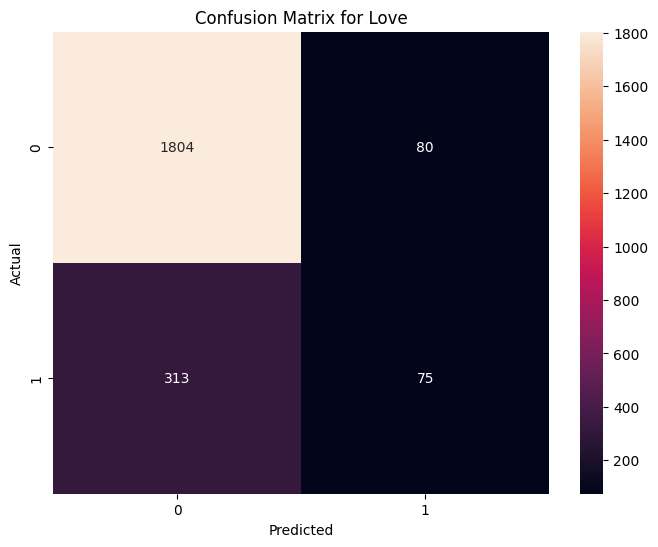

Evaluating for emotion: Joy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


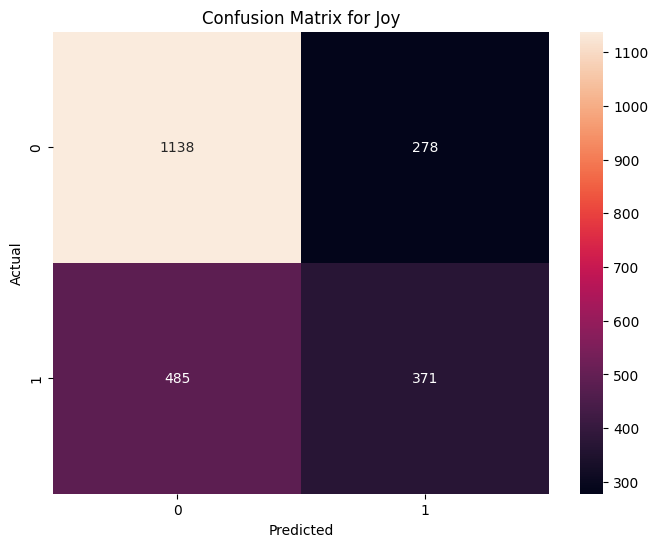

Evaluating for emotion: Surprise


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


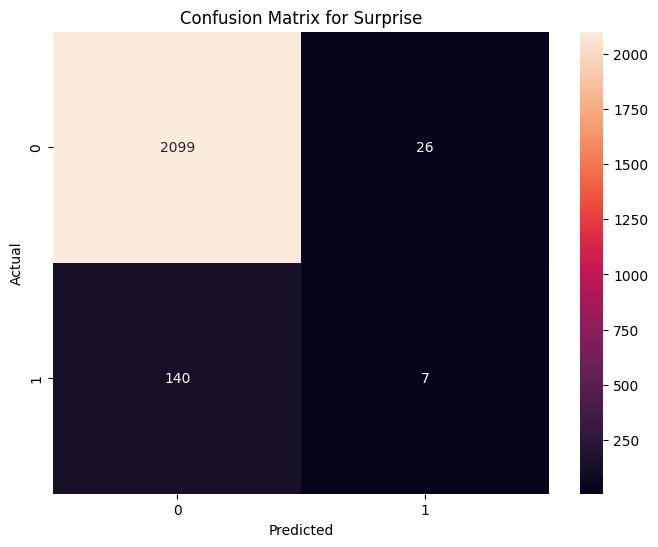

Evaluating for emotion: Anger


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


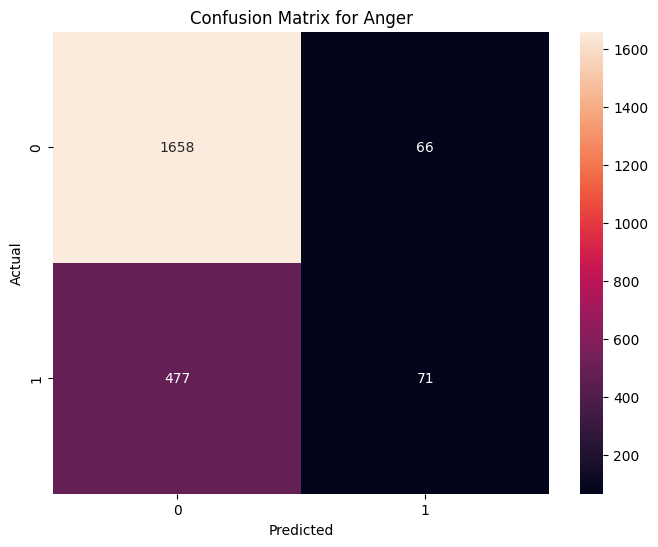

Evaluating for emotion: Sadness


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


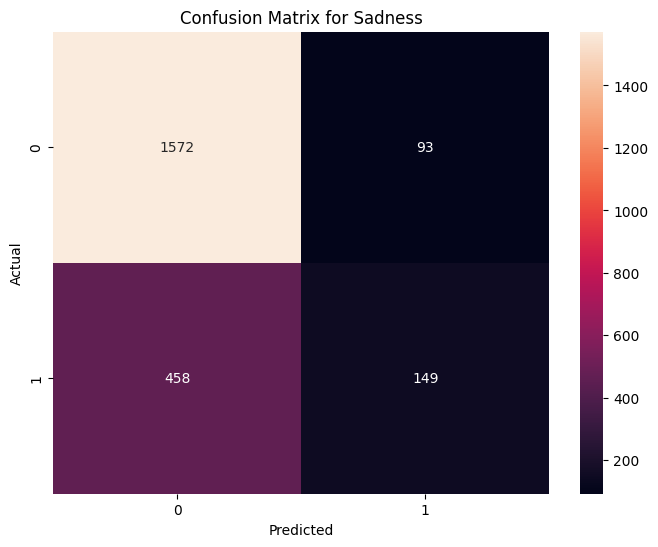

Evaluating for emotion: Fear


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


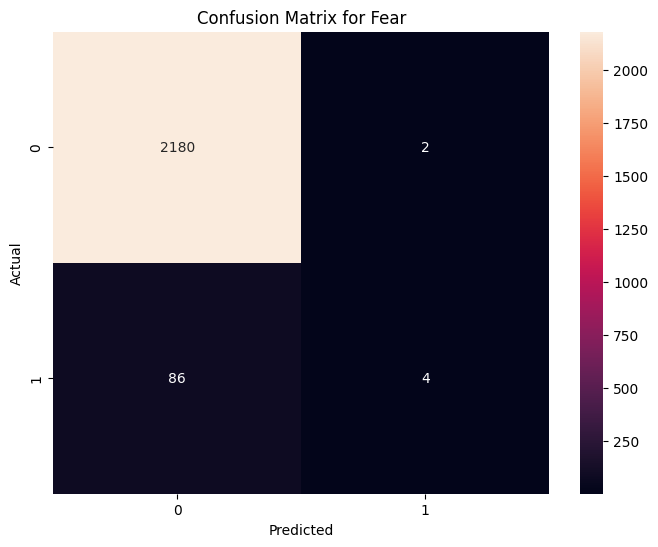

{'Love': 79.49, 'Joy': 65.25, 'Surprise': 90.48, 'Anger': 70.2, 'Sadness': 71.73, 'Fear': 94.47}
Macro Average F1-score:  78.6


In [57]:
feature_based_with_adaboost(df_train1, df_test, x1=1, y1=1, gram="word")